# **Project Mid Test -  Kecerdasan Buatan 02**

Akses Notebook: https://colab.research.google.com/drive/16VhxuAqRqxKTNw415cBa4Xjx46tnfyvx?usp=sharing

Akses Dataset: https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1

# BAB 1 - Data Kelompok
**Anggota Kelompok 12:**

## **ANDI FARHAN - 2006521616**
<img src="https://i.imgur.com/YaC7ApE.jpeg" alt="Alt text" title="Optional title" height="200">

Jobdesk:
1. Melakukan EDA untuk categorical dan numerical data
2. Menganalisis menggunakan metode classifier: **Decision Tree**

## **FIRZY ALLEN - 2006577555**
<img src="https://i.imgur.com/mZptTHh.png" alt="Alt text" title="Optional title" height="200">

Jobdesk:
1. Mengeksplorasi dan mengevaluasi elemen numerik dan kategorikal dalam dataset melalui EDA.
2. Menganalisis menggunakan metode classifier: **Naive Bayes**


## **MUHAMMAD FARHAN HANIFTYAJI - 2006468711**
<img src="https://i.imgur.com/HeugSJP.jpeg" alt="Alt text" title="Optional title" height="200">

Jobdesk:
1. Mengimplementasikan pemrosesan awal data, encoding untuk data kategorikal dan pemilihan fitur untuk model
2. Menganalisis menggunakan metode classifier: **Random Forest**

## Introduction

🚀 Selamat datang di Proyek UTS - Kecerdasan Buatan 02 - Kelompok 12 dengan topik "Multi-Class Prediction of Cirrhosis." Dalam Notebook Google Colab ini, misi kami adalah memprediksi hasil dari pasien sirosis menggunakan pendekatan multi-kelas.

Kumpulan data, yang terdiri dari 17 fitur klinis, menyediakan data yang cukup variatif untuk memahami dan memperkirakan kondisi kelangsungan hidup individu yang berurusan dengan sirosis hati. Status kelangsungan hidup, yang dilambangkan sebagai 0 = D (Kematian), 1 = C (Tersensor), dan 2 = CL (Tersensor karena transplantasi hati), dengan hal ini menjadi tantangan unik bagi kami untuk pemodelan prediktif pada percobaannya.

Percobaan kami akan mencakup analisis data eksplorasi (EDA) yang menyeluruh, preprocessing yang cukup medalam, dan pengembangan model yang kuat untuk mengatasi kompleksitas hasil sirosis dengan menggunakan pendekatan Decision Tree, KNN, dan Random Forest. Dengan hasil akhir dari metrik evaluasi utama, kami akan mendapatkan prediksi komperhensif .💡

# BAB 2 - DESKRIPSI DATA

## **Import Library dan Dataset**

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

# data (as pandas dataframes)
df = cirrhosis_patient_survival_prediction.data.original

In [ ]:
df.shape

(418, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           313 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        313 non-null    object 
 7   Hepatomegaly   313 non-null    object 
 8   Spiders        313 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    312 non-null    object 
 12  Albumin        418 non-null    float64
 13  Copper         312 non-null    object 
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  312 non-null    object 
 17  Platelets      411 non-null    object 
 18  Prothrombi

In [ ]:
df.describe()

,ID,N_Days,Age,Bilirubin,Albumin,Alk_Phos,SGOT,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,418.000000,312.000000,312.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,3.497440,1982.655769,122.556346,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,0.424972,2140.388824,56.699525,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,1.960000,289.000000,26.350000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,3.242500,871.500000,80.600000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,3.530000,1259.000000,114.700000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,3.770000,1980.000000,151.900000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,4.640000,13862.400000,457.250000,18.000000,4.000000


In [ ]:
df.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol       object
Albumin          float64
Copper            object
Alk_Phos         float64
SGOT             float64
Tryglicerides     object
Platelets         object
Prothrombin      float64
Stage            float64
dtype: object

# BAB 3 - Preprocessing Data

##  Penghapusan Fitur yang Kurang Relevan dan Pengecekan NaN Value

In [ ]:
df = df.drop(["ID", "N_Days"], axis=1)

In [ ]:
#Convert numeric data from object type to float64 type
converted_col = ["Cholesterol","Copper", "Tryglicerides", "Platelets"]
df = df.replace(['NaNN', 'NaN'], np.nan)

df[converted_col] = df[converted_col].astype(float)
df.dtypes

Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [ ]:
#Checking the missing value for the dataset
missing_values = df.isnull().sum()

# Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Filter missing values based on numerical and categorical columns
missing_numerical = missing_values[numerical_columns]
missing_categorical = missing_values[categorical_columns]

# Print the results
print("Numerical columns with missing values:")
print(missing_numerical[missing_numerical > 0])

print("\nCategorical columns with missing values:")
print(missing_categorical[missing_categorical > 0])

Numerical columns with missing values:
Cholesterol      134
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

Categorical columns with missing values:
Drug            106
Ascites         106
Hepatomegaly    106
Spiders         106
dtype: int64


Dapat dilihat bahwa masih terdapat kolom yang memiliki null value di dalamnya. kelompok kami akan menggunakan imputasi baik pada numerical dan categorial data yang ada untuk mengisi null value tersebut

In [ ]:
# Impute missing values with  for numerical columns
for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Impute missing values with mode for categorical columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Check if there are still missing values
missing_values_after_imputation = df.isnull().sum()

# Print the results
print("Missing values after imputation:")
print(missing_values_after_imputation[missing_values_after_imputation > 0])

Missing values after imputation:
Series([], dtype: int64)


Imputasi yang digunakan adalah dengan mengisi null value yang ada baik pada categorial data maupun numerical data di tiap kolum. Imputasi dengan nilai modus digunakan karena modus cocok untuk tipe data diskrit dan imputasi mean cocok untuk data yang terdistribusi secara normal

## Exploratory Data Analysis (EDA)

Pada section ini kita akan melihat pesebaran data yang ada pada dataset terhadap target kelas baik pada categorial data maupun numerical data.

C     232
D     161
CL     25
Name: Status, dtype: int64


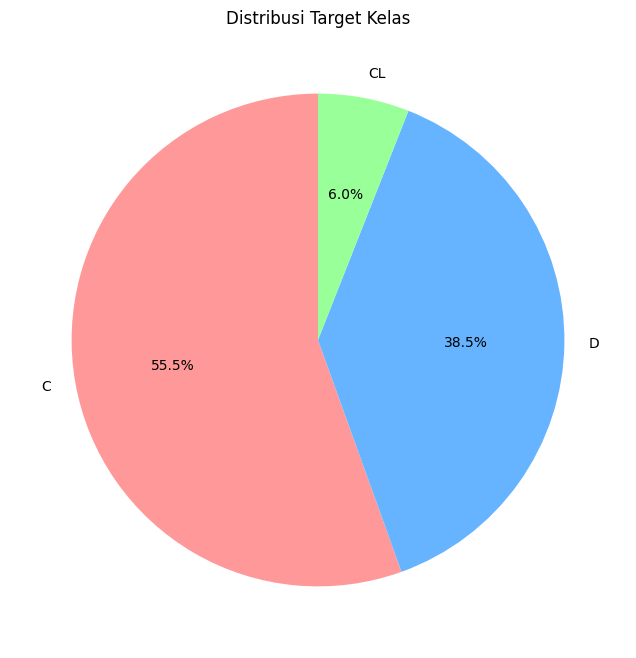

In [ ]:
# Checking the distributionn of the target class

status_counts = df['Status'].value_counts()
print(status_counts)

plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribusi Target Kelas')
plt.show()

dapat dilihat bahwa distribusi kelas dari dataset ini kurang balance terutama pada kelas CL, sehingga kita akan menggunakan oversampling menggunakan random oversampling pada nantinya untuk kelas target

In [ ]:
# Define the numerical and categorial for futher inspection

numerical_features = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                      'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

categorial_column = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']

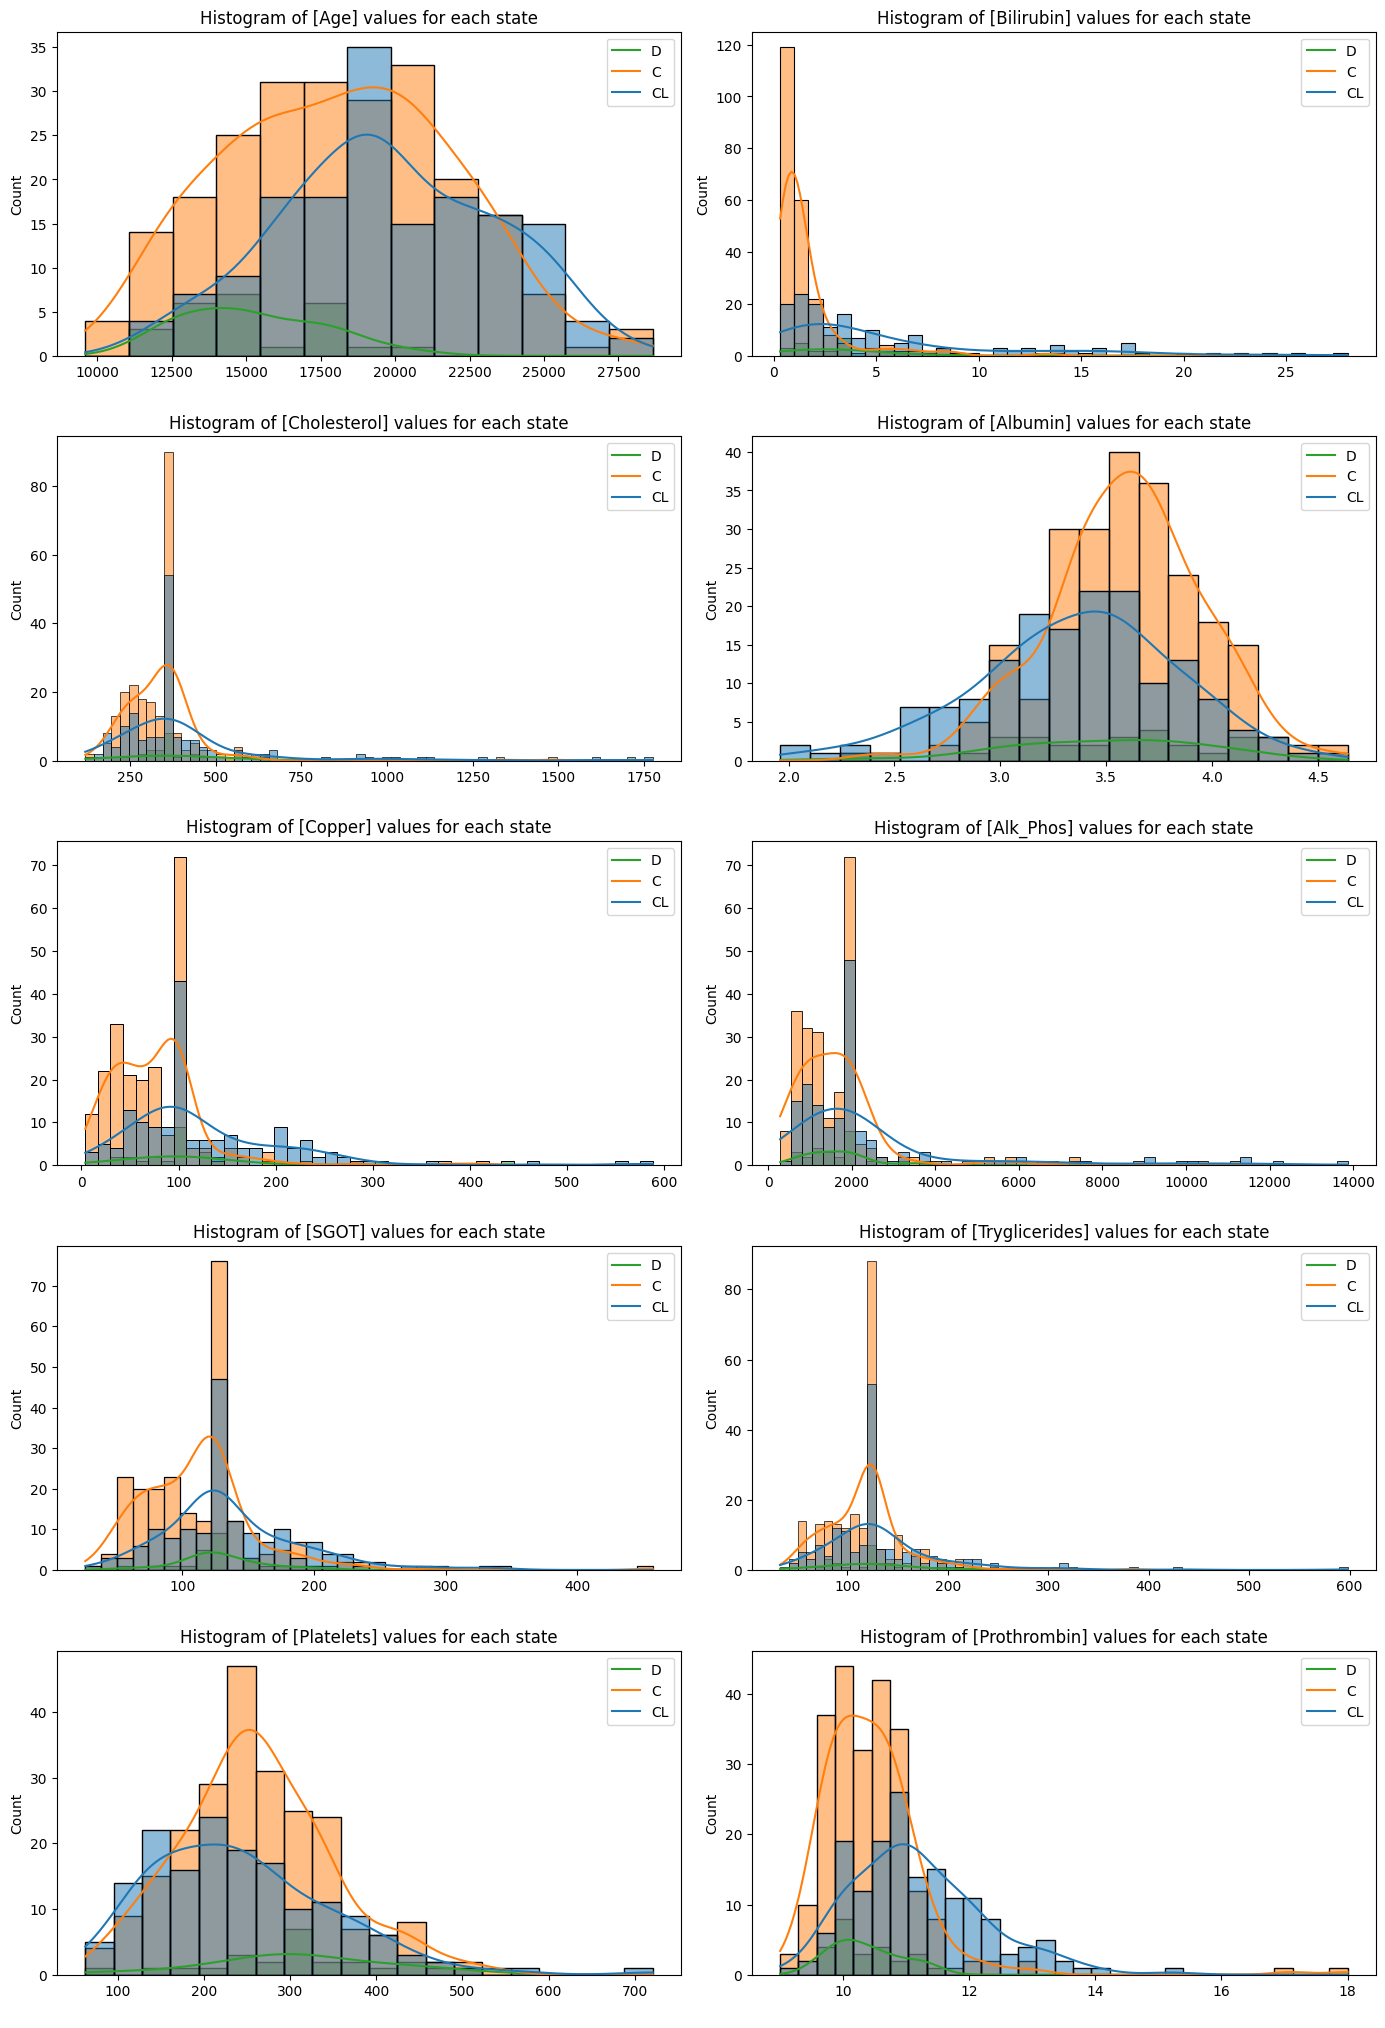

In [ ]:
# Ploting the distribution of the numerical data for EDA

plt.figure(figsize=(14, 24))
j = 1

for i in df.columns:
    if i != 'Stage' and df[i].dtype != 'object':
        plt.subplot(6, 2, j)
        sns.histplot(data=df, x=df[i], kde=True, hue=df['Status'])
        plt.title('Histogram of [' + i + '] values for each state', size=12)
        plt.xlabel(" ")
        plt.legend(['D', 'C', 'CL'], loc=0)
        j += 1

# Adjust layout
plt.tight_layout()
plt.show()

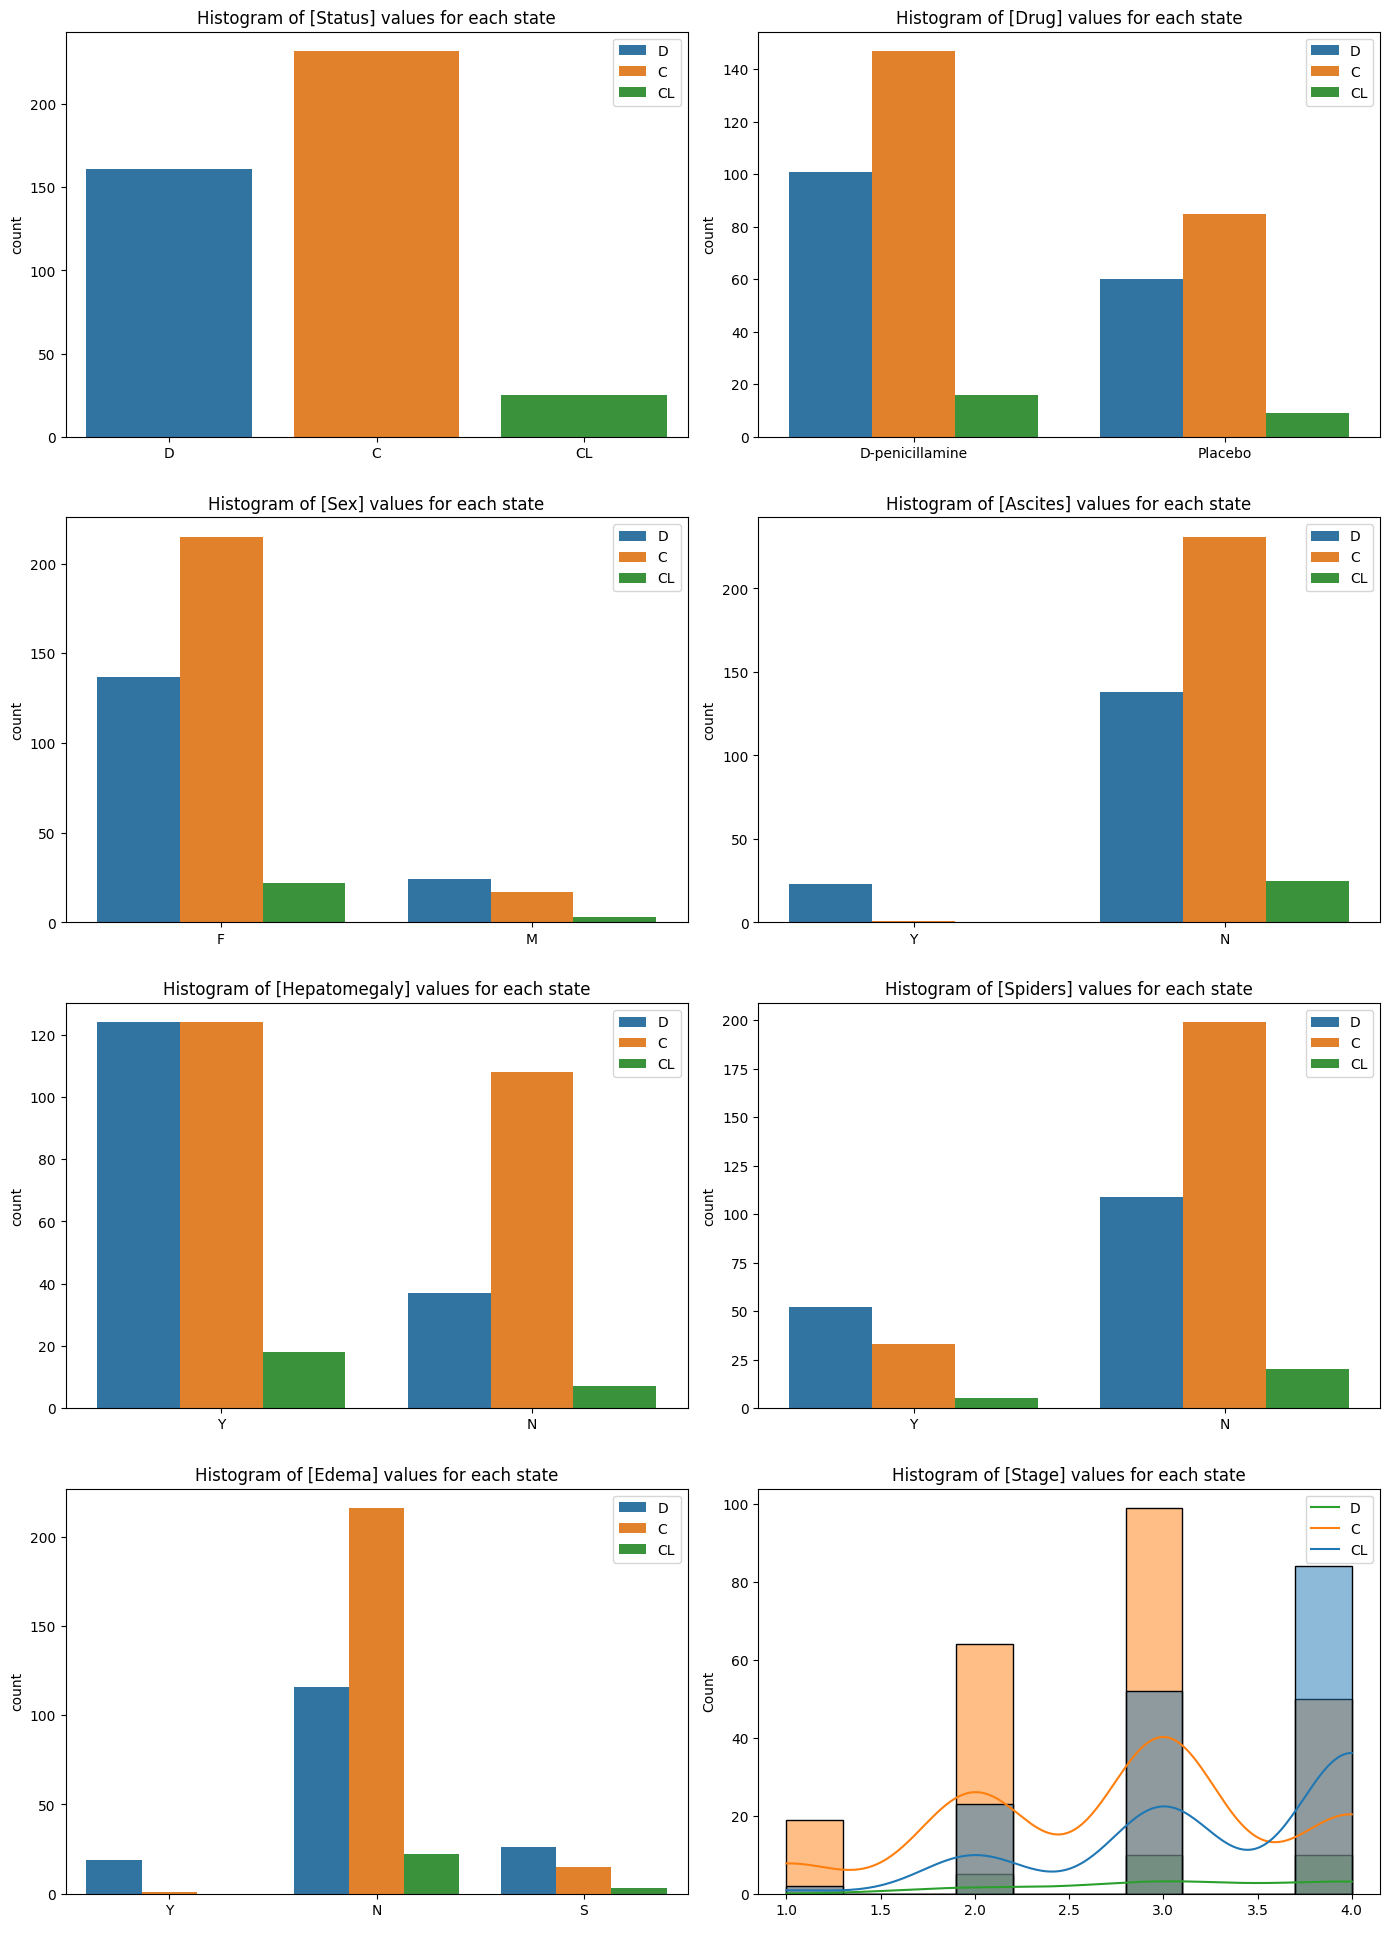

In [ ]:
# Ploting the distribution of the numerical data for EDA

j = 1
plt.figure(figsize=(14, 24))

for i in categorial_column:
    plt.subplot(5, 2, j)
    if i != 'Stage':
        sns.countplot(data=df, x=i, hue='Status')
        plt.title('Histogram of [' + i + '] values for each state', size=12)
        plt.xlabel(" ")
        plt.legend(['D', 'C', 'CL'], loc=0)
    else:
        sns.histplot(data=df, x=i, kde=True, hue='Status')
        plt.title('Histogram of [' + i + '] values for each state', size=12)
        plt.xlabel(" ")
        plt.legend(['D', 'C', 'CL'], loc=0)
    j += 1

plt.tight_layout()
plt.show()

## Oversampling Data

Data yang minor cenderunngk akan tidak terlihat ketimbang dengan data majority. Hal ini akan menimbulkan bias pada model yang akan dibuat. Oleh karena itu diperlukan oversampling. Oversampling merupakan teknik dimana instance dari kelas minoritas diduplikasi secara acak dan ditambahkan ke dataset pelatihan. Hal ini akan membuat dataset menjadi balanced dan membuat prediksi model tidak bias

D     232
C     232
CL    232
Name: Status, dtype: int64


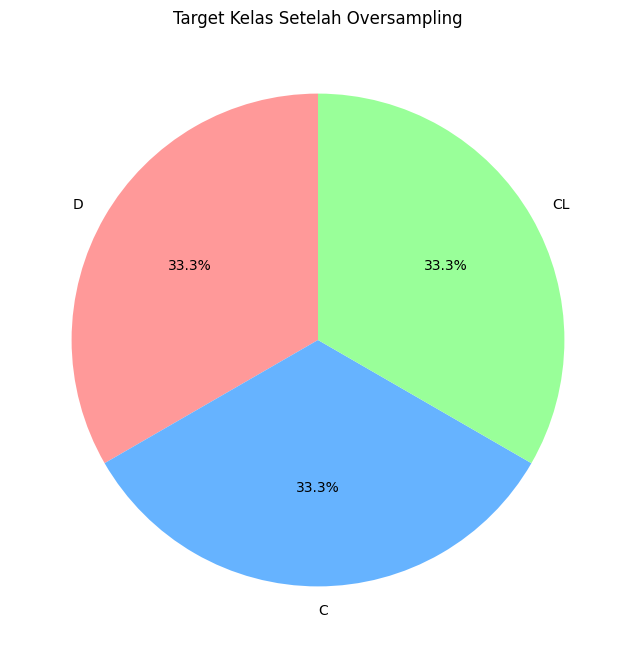

In [ ]:
X = df.drop('Status', axis=1)
y = df['Status']

#  RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

df = pd.DataFrame(X_resampled, columns=X.columns)
df['Status'] = y_resampled

print(df['Status'].value_counts())

resampled_counts = df['Status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(resampled_counts, labels=resampled_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Target Kelas Setelah Oversampling')
plt.show()


Dalam hal ini, kami menggunakan Random Oversampling untuk mengatasi imbalanced class tersebut. Random Oversampling melibatkan duplikasi contoh secara acak dari kelas minoritas dan menambahkannya ke kumpulan data pelatihan. Dalam Hal ini kelas CL dan juga D diduplikasi sehingga kedua kelas tersebut memiliki kelas yang sama dengan kelas mayoritas C. Lihat juga bahwa dataset yang awalnya berjumlah 418 menjadi 696.

## Encoding Terhadap Categorial Data

Encoding dilakukan untuk mempersiapkan data ketika melakukan pembelajaran mesin. Hal ini berguna untuk mempermudah mesin dalam melakukan prediksi nantinya dengan menggunakan data yang adan sehingga akan berdampak pada performa model yang dibuat. terdapat beberapa jenis encoding yang digunakan dalam proyek ini yaitu:

- One-Hot Encoding :  Jenis encoding yang akan membuat fitur atau kolom baru berdasarkan banyak unique value yang ada pada kolom yang ingin di encode. dalam hal ini One-Hot encoding digunakan untuk column Drug dan Edema

- Ordinal Encoding : Jenis encoding ini digunakan untuk tipe data kategorial menjadi numerik dengan tetap mempertahankan urutan seberapa pentingnya kategori tersebut

- Label Encoder : transformator yang mengubah nilai target menjadi nilai numerik, biasanya untuk pelabelan kategorikal. Hal ini dimaksudkan untuk menyederhanakan pemrosesan data dengan algoritma pembelajaran mesin dengan mengubah label kategorikal menjadi representasi numerik.

In [ ]:
# Checking the current column in dataset before the encoding

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Drug           696 non-null    object 
 1   Age            696 non-null    int64  
 2   Sex            696 non-null    object 
 3   Ascites        696 non-null    object 
 4   Hepatomegaly   696 non-null    object 
 5   Spiders        696 non-null    object 
 6   Edema          696 non-null    object 
 7   Bilirubin      696 non-null    float64
 8   Cholesterol    696 non-null    float64
 9   Albumin        696 non-null    float64
 10  Copper         696 non-null    float64
 11  Alk_Phos       696 non-null    float64
 12  SGOT           696 non-null    float64
 13  Tryglicerides  696 non-null    float64
 14  Platelets      696 non-null    float64
 15  Prothrombin    696 non-null    float64
 16  Stage          696 non-null    float64
 17  Status         696 non-null    object 
dtypes: float64

dilakukan pengecekan terlebih dahulu jumlah kolom dan tipe yanga ada dan juga unique value yang ada pada kategorikal data

In [ ]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Print unique values for each categorical column
for col in categorical_columns:
    print(f"Unique values for column '{col}':")
    print(df[col].unique())
    print()

Unique values for column 'Drug':
['D-penicillamine' 'Placebo']

Unique values for column 'Sex':
['F' 'M']

Unique values for column 'Ascites':
['Y' 'N']

Unique values for column 'Hepatomegaly':
['Y' 'N']

Unique values for column 'Spiders':
['Y' 'N']

Unique values for column 'Edema':
['Y' 'N' 'S']

Unique values for column 'Status':
['D' 'C' 'CL']



In [ ]:
# One-Hot Encoding

encoded_drug = pd.get_dummies(df['Drug'], prefix='Drug')
encoded_edema = pd.get_dummies(df['Edema'], prefix='Edema')

df = pd.concat([df, encoded_drug, encoded_edema], axis=1)
df.drop(['Drug', 'Edema'], axis=1, inplace=True)

print(df.head())

     Age Sex Ascites Hepatomegaly Spiders  Bilirubin  Cholesterol  Albumin  \
0  21464   F       Y            Y       Y       14.5        261.0     2.60   
1  20617   F       N            Y       Y        1.1        302.0     4.14   
2  25594   M       N            N       N        1.4        176.0     3.48   
3  19994   F       N            Y       Y        1.8        244.0     2.54   
4  13918   F       N            Y       Y        3.4        279.0     3.53   

   Copper  Alk_Phos  ...  Tryglicerides  Platelets  Prothrombin  Stage  \
0   156.0    1718.0  ...          172.0      190.0         12.2    4.0   
1    54.0    7394.8  ...           88.0      221.0         10.6    3.0   
2   210.0     516.0  ...           55.0      151.0         12.0    4.0   
3    64.0    6121.8  ...           92.0      183.0         10.3    4.0   
4   143.0     671.0  ...           72.0      136.0         10.9    3.0   

   Status Drug_D-penicillamine  Drug_Placebo  Edema_N  Edema_S  Edema_Y  
0       D   

Dalam hal ini kolom Drug dan Edema akan menggunakan One-Hot Encoding sebagai encodernya

In [ ]:
# Ordinal Encoding

ordinal_columns = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders']

ordinal_encoder = OrdinalEncoder()
df[ordinal_columns] = ordinal_encoder.fit_transform(df[ordinal_columns])

print(df.head())

     Age  Sex  Ascites  Hepatomegaly  Spiders  Bilirubin  Cholesterol  \
0  21464  0.0      1.0           1.0      1.0       14.5        261.0   
1  20617  0.0      0.0           1.0      1.0        1.1        302.0   
2  25594  1.0      0.0           0.0      0.0        1.4        176.0   
3  19994  0.0      0.0           1.0      1.0        1.8        244.0   
4  13918  0.0      0.0           1.0      1.0        3.4        279.0   

   Albumin  Copper  Alk_Phos  ...  Tryglicerides  Platelets  Prothrombin  \
0     2.60   156.0    1718.0  ...          172.0      190.0         12.2   
1     4.14    54.0    7394.8  ...           88.0      221.0         10.6   
2     3.48   210.0     516.0  ...           55.0      151.0         12.0   
3     2.54    64.0    6121.8  ...           92.0      183.0         10.3   
4     3.53   143.0     671.0  ...           72.0      136.0         10.9   

   Stage  Status Drug_D-penicillamine  Drug_Placebo  Edema_N  Edema_S  Edema_Y  
0    4.0       D       

Ordinal encoding akan digunakan dalam kolom Sex, Ascites, Hepatomegaly, dan Spiders

In [ ]:
# Label encoder for Target class

print("Before label encoding:")
print(df['Status'].unique())

label_encoder = LabelEncoder()
df['Status'] = label_encoder.fit_transform(df['Status'])

print("\nAfter label encoding:")
print(df['Status'].unique())

Before label encoding:
['D' 'C' 'CL']

After label encoding:
[2 0 1]


Label Encoder digunakan pada kolom 'Status' sebagai target dalam model kali ini

## Pengecekan Outlier dan Handling Outlier

Titik data yang secara menyimpang dari observasi lain dalam kumpulan data disebut outlier. variabilitas pengukuran, data yang baru dikumpulkan, atau kesalahan eksperimen, dapat menghasilkan outlier. Outlier dapat mempengaruhi model hasil dari training dan testing model. Oleh karena itu pada kali ini kita akan melakukan pengecekan data dan melihat apakah kita dapat menghapus outlier yang ada

In [ ]:
# Checking outlier using standar deviation

outlier_df = df.copy()

feature_means = outlier_df[numerical_features].mean()
feature_std_devs = outlier_df[numerical_features].std()

num_standard_deviations = 5
thresholds = num_standard_deviations * feature_std_devs

outliers = (np.abs(outlier_df[numerical_features] - feature_means) > thresholds).any(axis=1)

print(f'Number of outliers detected: {sum(outliers)}')

Number of outliers detected: 30


Dari hasil yang ditemukan menggunakan standar deviasi sebesar 5, didapatkan outlier sebanyak 30 data. Data outlier ini yang nantinya akan kita buang agar tidak memengaruhi model

In [ ]:
# Remove outliers from the original DataFrame
cleaned_df = df[~outliers]

# Print the shape of the cleaned DataFrame to verify the removal of outliers
print("Before removing outliers:", df.shape)
print("After removing outliers:", cleaned_df.shape)

Before removing outliers: (696, 21)
After removing outliers: (666, 21)


Setelah menghapus yang ada, dilakukan pengecekan kembali terhadap entry data. Dataset yang telah melalui process preprocessing ini akan lanjut ke tahap selanjutnya yaitu penentuan fitur untuk model

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   666 non-null    int64  
 1   Sex                   666 non-null    float64
 2   Ascites               666 non-null    float64
 3   Hepatomegaly          666 non-null    float64
 4   Spiders               666 non-null    float64
 5   Bilirubin             666 non-null    float64
 6   Cholesterol           666 non-null    float64
 7   Albumin               666 non-null    float64
 8   Copper                666 non-null    float64
 9   Alk_Phos              666 non-null    float64
 10  SGOT                  666 non-null    float64
 11  Tryglicerides         666 non-null    float64
 12  Platelets             666 non-null    float64
 13  Prothrombin           666 non-null    float64
 14  Stage                 666 non-null    float64
 15  Status                6

## **Melakukan Feature Selection**

Pada section ini kita akan menggunakan pearson correlation untuk melihat korelasi antar fitur dan menentukan fitur yang paling berpengaruh dalam menentukan target kelas. Pada proyek ini kelompok kami menggunakan korelasi pearson. Korelasi pearson cocok digunakan apabila data yang ingin dicek korelasinya berupa quantitative dan memiliki hubungan linear.

In [ ]:
correlation_matrix = cleaned_df.corr(method='pearson')
correlation_matrix

,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,...,Tryglicerides,Platelets,Prothrombin,Stage,Status,Drug_D-penicillamine,Drug_Placebo,Edema_N,Edema_S,Edema_Y
Age,1.000000,1.551494e-01,2.236630e-01,0.077403,-0.111821,0.050630,-0.122367,-0.215186,-0.004184,0.061635,...,0.056111,-0.200574,0.176341,0.091279,0.203360,0.185362,-0.185362,-0.107451,0.035521,0.152271
Sex,0.155149,1.000000e+00,6.080846e-17,-0.073116,-0.138331,-0.044658,0.024051,0.079850,0.336082,0.007150,...,0.101323,-0.068104,0.099768,0.022650,0.108860,0.099249,-0.099249,-0.003010,-0.006679,0.018227
Ascites,0.223663,6.080846e-17,1.000000e+00,0.032918,0.133542,0.299388,-0.051149,-0.245220,0.117022,0.002067,...,0.119021,-0.155457,0.308288,0.148449,0.239016,-0.018166,0.018166,-0.325194,0.022003,0.616407
Hepatomegaly,0.077403,-7.311628e-02,3.291796e-02,1.000000,0.161793,0.167299,0.052586,-0.227331,0.088833,0.043643,...,0.055653,-0.230279,0.154096,0.319712,0.200465,0.024025,-0.024025,-0.121572,0.144570,-0.017633
Spiders,-0.111821,-1.383311e-01,1.335422e-01,0.161793,1.000000,0.168746,-0.008911,-0.089574,0.192737,-0.024428,...,0.071603,-0.159629,0.240463,0.212151,0.121258,-0.294908,0.294908,-0.219477,0.134347,0.198599
Bilirubin,0.050630,-4.465764e-02,2.993876e-01,0.167299,0.168746,1.000000,0.319108,-0.267013,0.271248,0.107289,...,0.311690,0.061104,0.300465,0.098333,0.356362,-0.019756,0.019756,-0.146965,-0.001142,0.298744
Cholesterol,-0.122367,2.405066e-02,-5.114882e-02,0.052586,-0.008911,0.319108,1.000000,0.034992,0.080843,0.191556,...,0.240832,0.156059,0.052131,0.040280,0.141985,0.042514,-0.042514,0.050473,-0.025405,-0.055662
Albumin,-0.215186,7.985047e-02,-2.452200e-01,-0.227331,-0.089574,-0.267013,0.034992,1.000000,-0.093735,-0.074625,...,0.003880,0.131135,-0.171380,-0.310899,-0.205570,-0.090788,0.090788,0.211685,-0.087481,-0.268140
Copper,-0.004184,3.360819e-01,1.170220e-01,0.088833,0.192737,0.271248,0.080843,-0.093735,1.000000,0.040249,...,0.419936,-0.012561,0.101765,0.193272,0.256288,-0.017306,0.017306,-0.003596,-0.039955,0.079955
Alk_Phos,0.061635,7.150481e-03,2.067428e-03,0.043643,-0.024428,0.107289,0.191556,-0.074625,0.040249,1.000000,...,0.041980,0.055568,0.062546,0.029404,0.159006,0.111564,-0.111564,0.006959,-0.021877,0.025757


<ipython-input-26-d5ed37a688c1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')


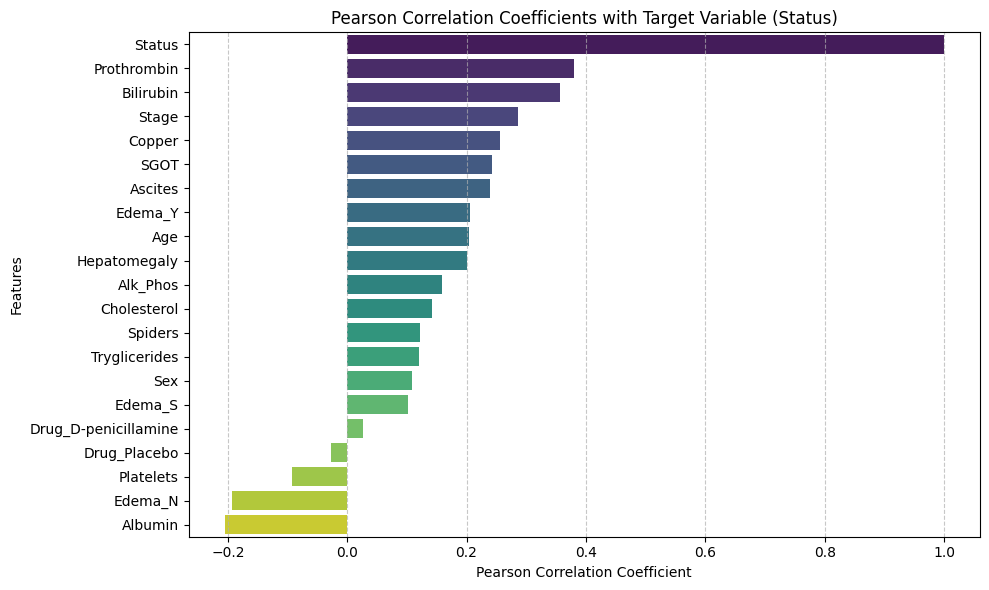

In [ ]:
correlation_with_target = correlation_matrix['Status'].sort_values(ascending=False)

# Plot Pearson correlation coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Features')
plt.title('Pearson Correlation Coefficients with Target Variable (Status)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

berdasarkan korelasi pearson yang didapat, kita akan menggunakan top 6 fitur yang paling memengaruhi target kelas Status yaitu:

-  Bilirubin
-  Prothrombin
-  Stage
-  Copper
-  Ascites
-  SGOT

In [ ]:
selected_features = ['Bilirubin', 'Prothrombin', 'Stage', 'Copper', 'Ascites', 'SGOT']

fitur yang dipilih akan disimpan ke dalam variable baru untuk kemudian digunakan oleh model machine learning dalam melakukan klasifikasi

In [ ]:
X = cleaned_df[selected_features]
y = cleaned_df['Status']

setelah fitur disimpan maka kita akan masukkan kedalam variable X sebagai fitur yang digunakan untuk training model dengan y adalah target dari model klasifikasi

# **BAB 4 - Training Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.1 Decision Tree (Andi Farhan)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

### Proses Pembuatan Model

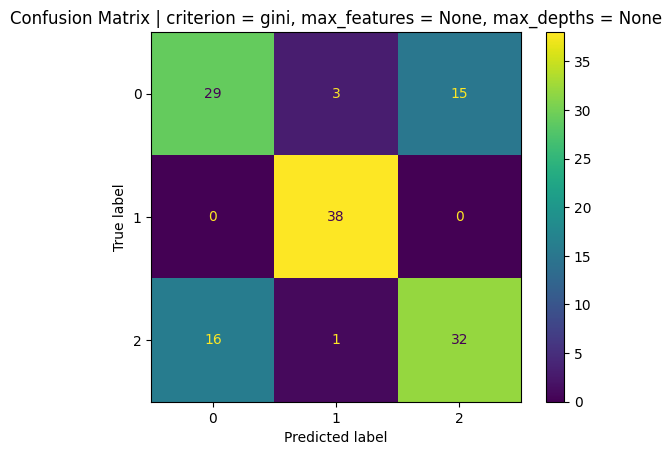

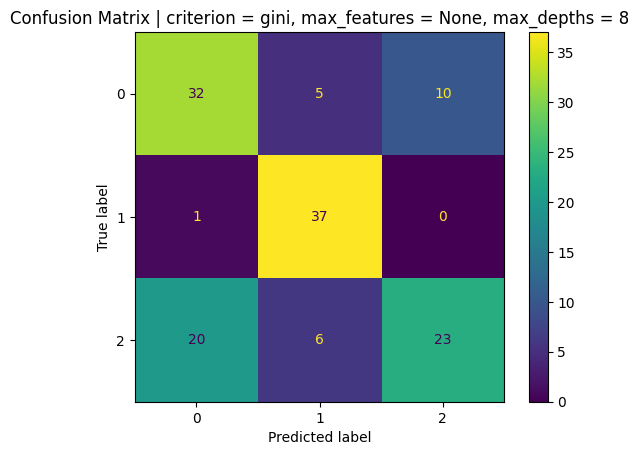

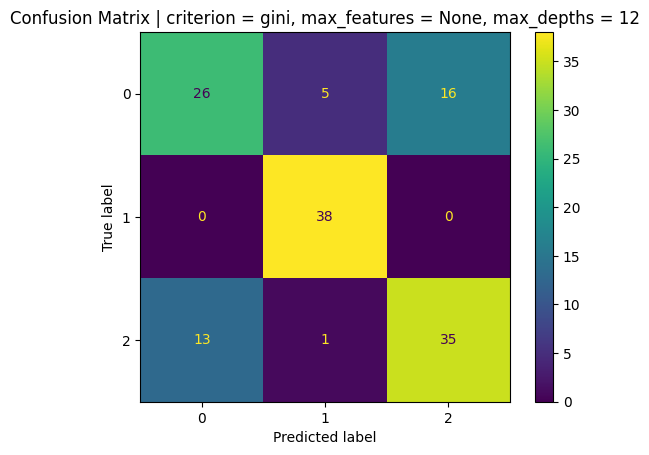

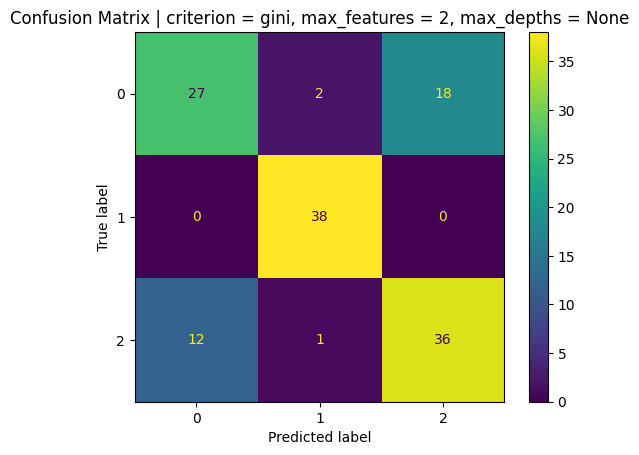

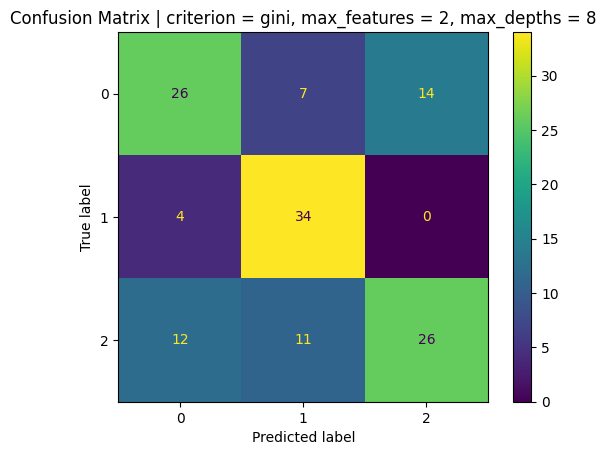

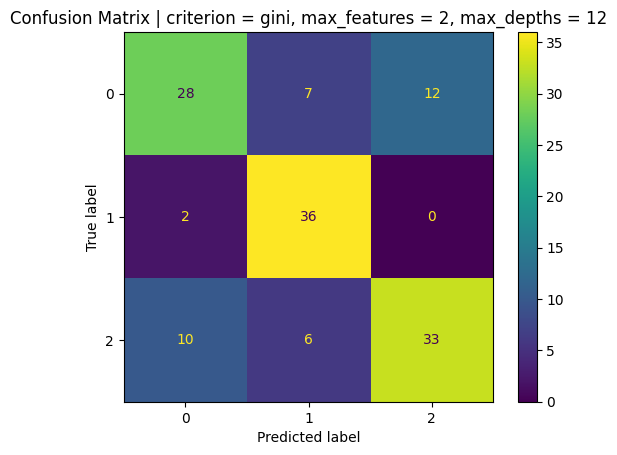

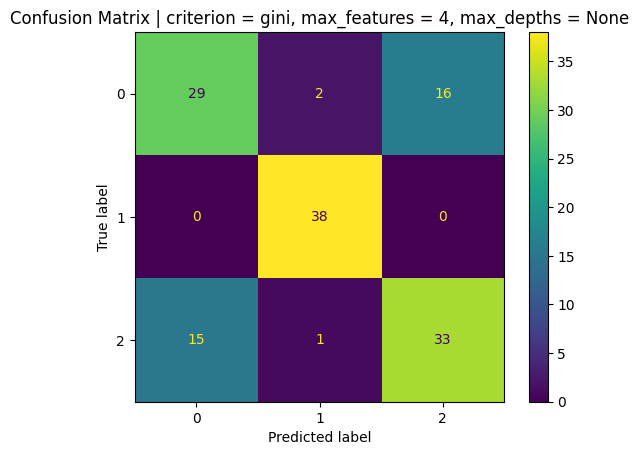

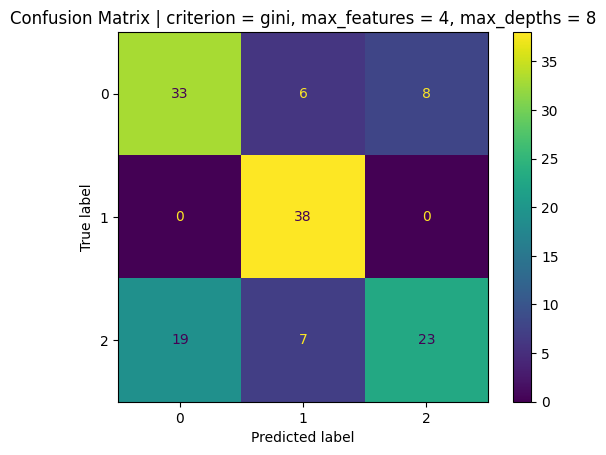

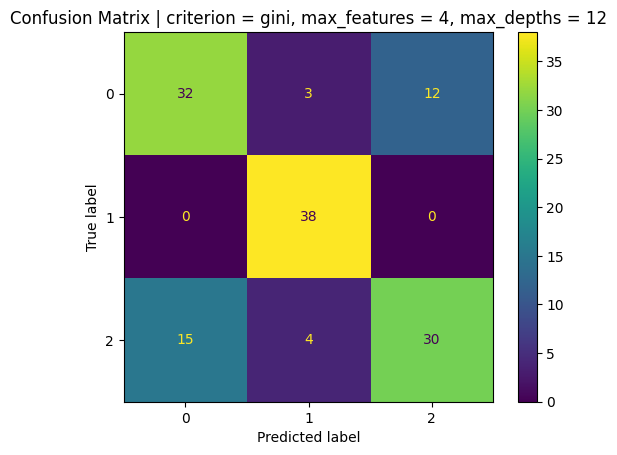

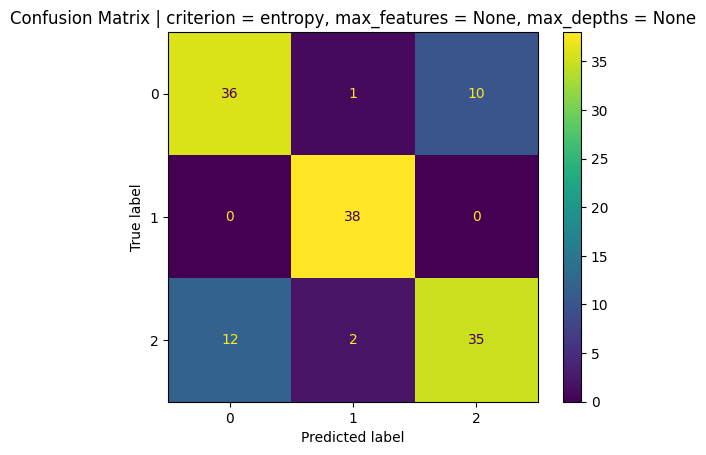

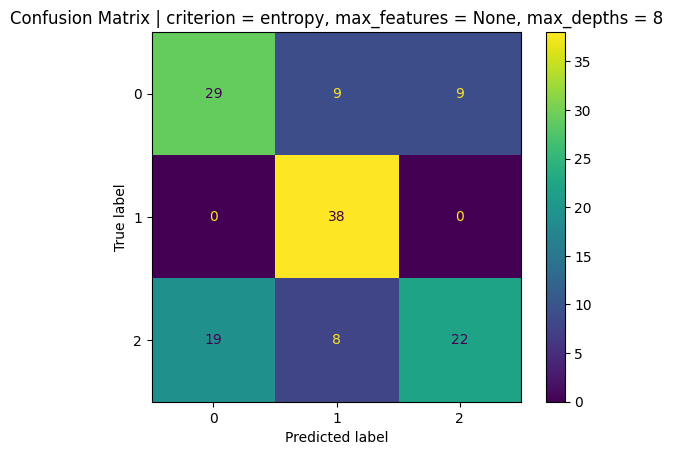

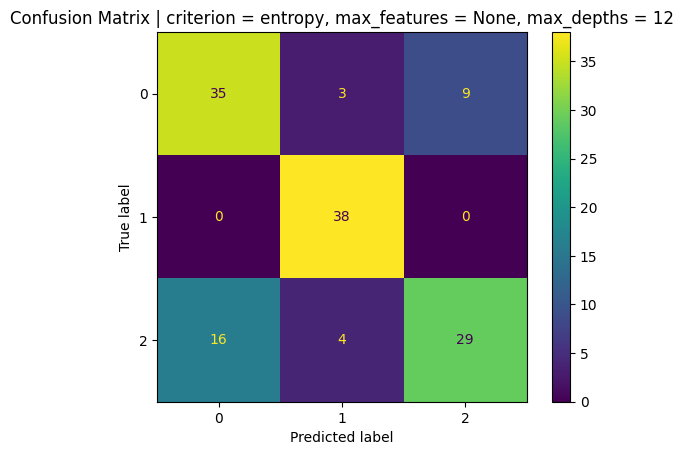

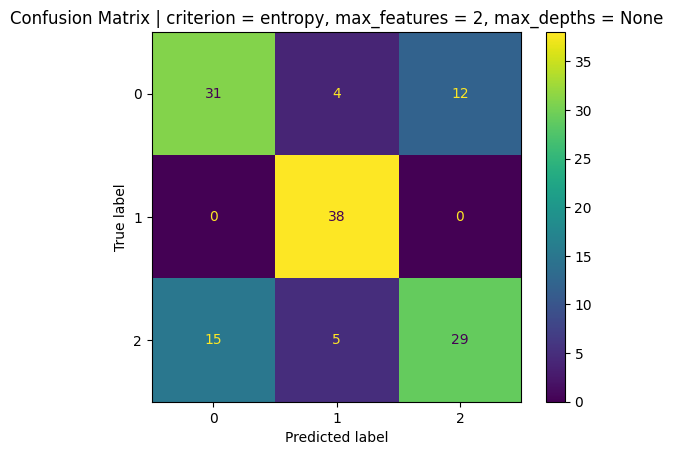

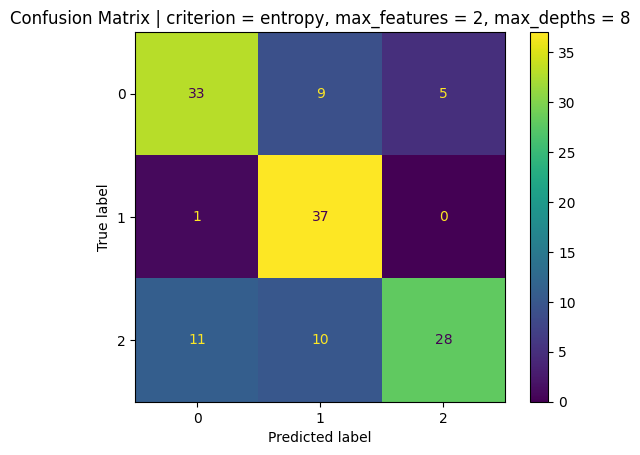

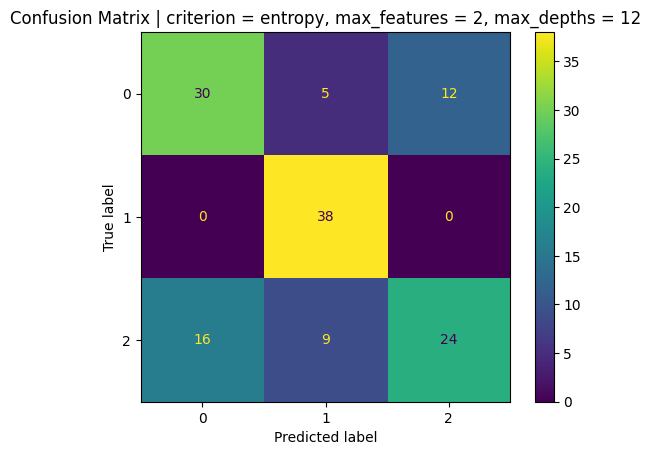

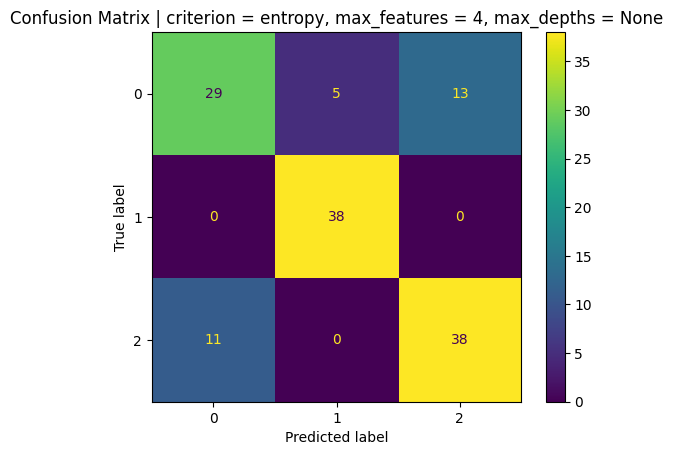

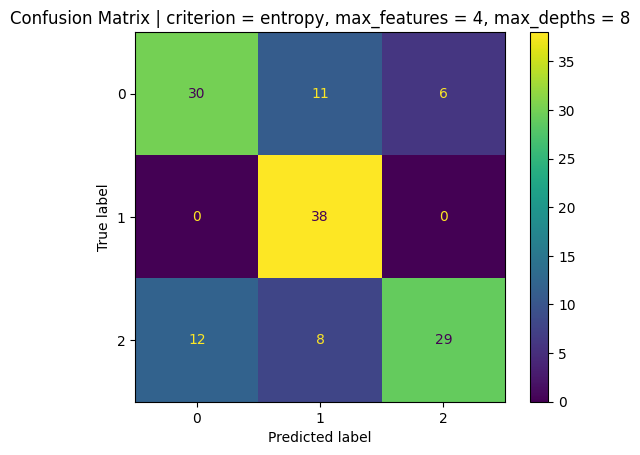

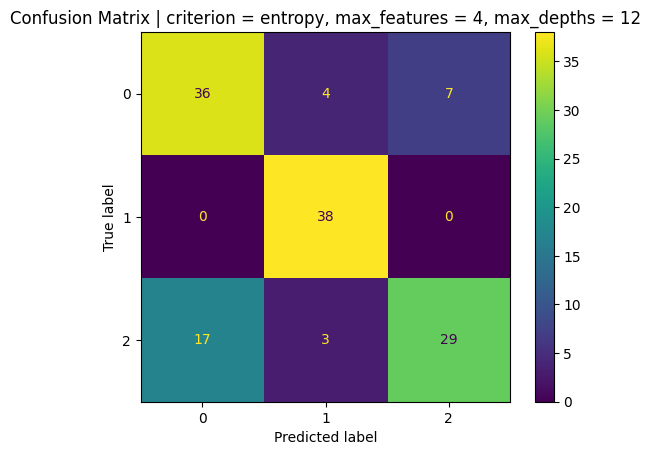

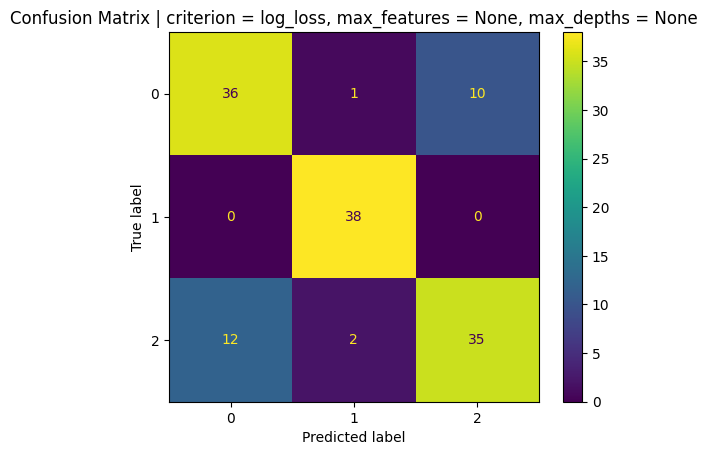

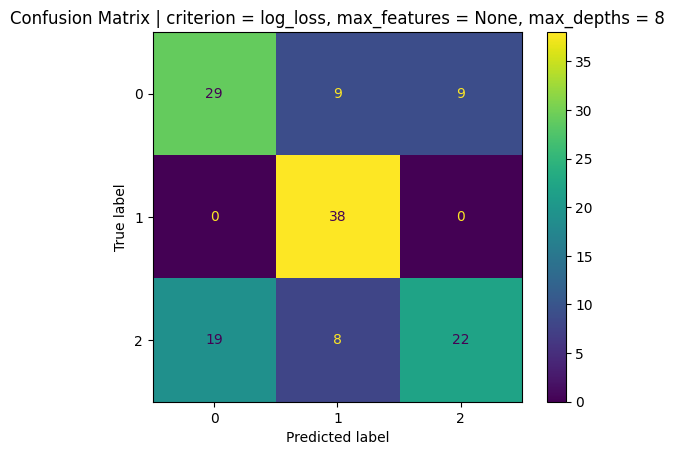

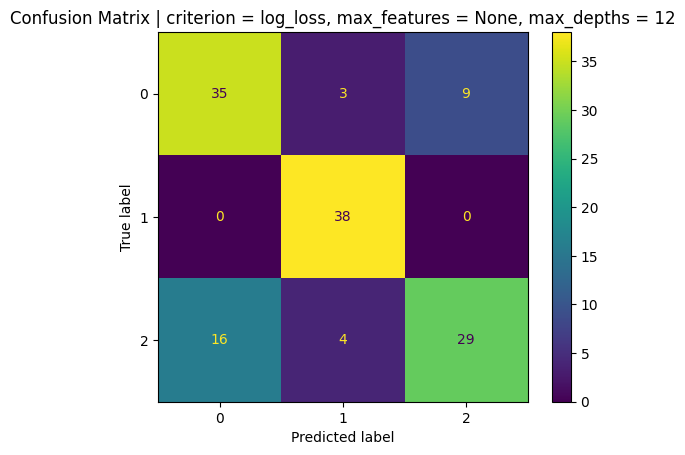

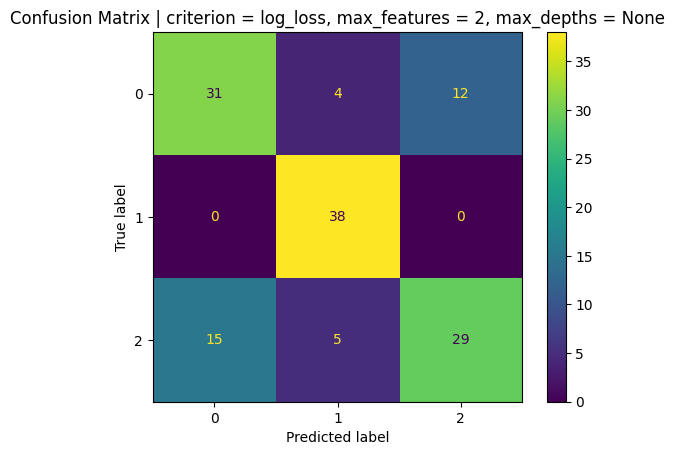

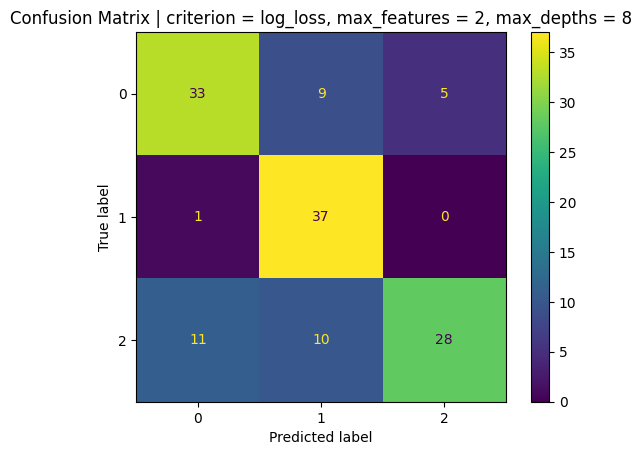

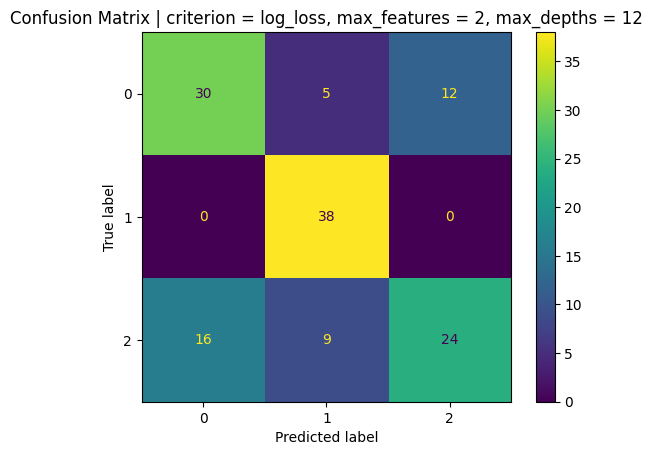

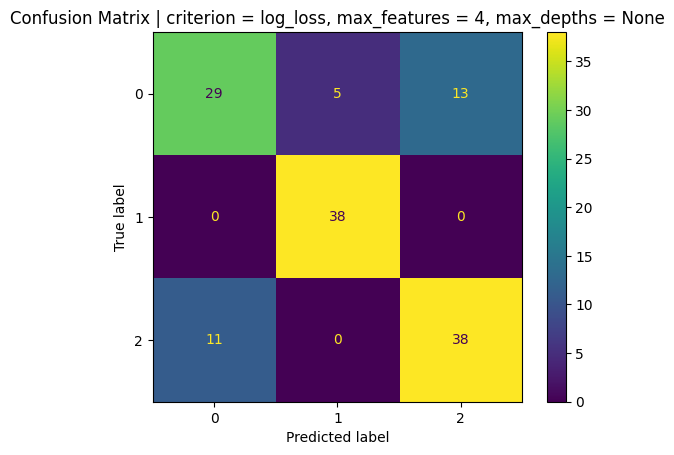

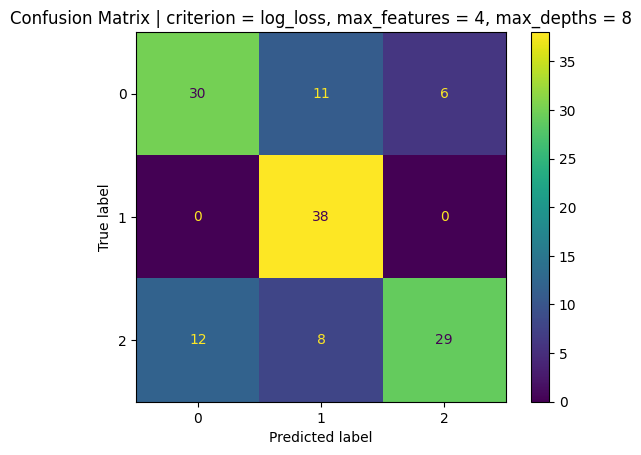

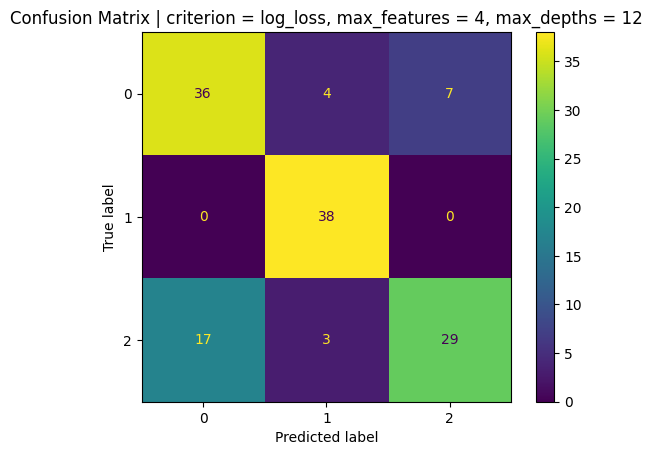

In [ ]:
criterions = ['gini', 'entropy', 'log_loss']
max_features_used = [None, 2, 4]
max_depths = [None, 8, 12]
results = []

for i in criterions :
  for j in max_features_used :
    for k in max_depths:
      the_tree = DecisionTreeClassifier(criterion = i, max_features= j, max_depth = k, random_state=42)
      the_tree.fit(X_train, y_train)

      prediction = the_tree.predict(X_test)

      report = metrics.classification_report(y_test, prediction, output_dict=True)
      cm = metrics.confusion_matrix(y_test, prediction)
      cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

      cm_display.plot()
      plt.title(f'Confusion Matrix | criterion = {i}, max_features = {j}, max_depths = {k}')
      plt.show()

      results.append({
           'criterion': i,
           'max_features': j,
           'max_depth': k,
           'Accuracy': report['accuracy'],
           'Precision': report['weighted avg']['precision'],
           'Recall': report['weighted avg']['recall'],
           'F1-score': report['weighted avg']['f1-score'],
           'Confusion Matrix': cm
      })

### Pengukuran Performa

#### Akurasi

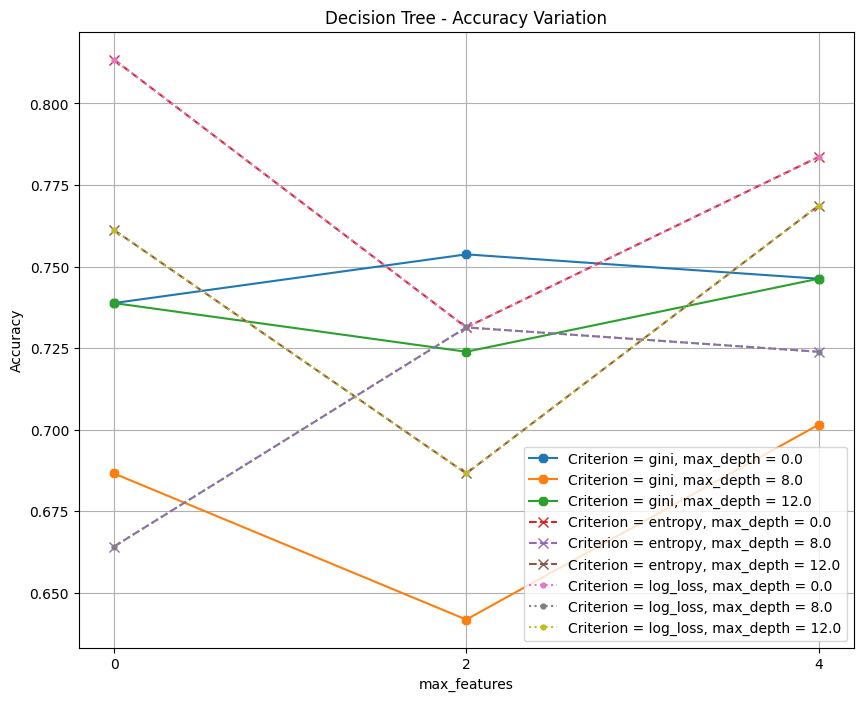

In [ ]:
df_result = pd.DataFrame(results).fillna(0)
depths = np.asarray(df_result['max_depth'].unique()).tolist()
lines = {'gini':'8-','entropy':'x--','log_loss':'.:'}
plt.figure(figsize=(10,8))

for i in criterions:
  for j in depths:
    x_values = np.asarray(df_result.loc[(df_result['max_depth'] == j) & (df_result['criterion']== i)]['max_features'])
    y_values = np.asarray(df_result.loc[(df_result['max_depth'] == j) & (df_result['criterion']== i)]['Accuracy'])
    plt.plot(x_values, y_values, lines[i], label=f'Criterion = {i}, max_depth = {j}', markersize=7)

plt.xlabel('max_features')
plt.xticks(x_values)
plt.grid(True)
plt.ylabel('Accuracy')
plt.title("Decision Tree - Accuracy Variation")
plt.legend()
plt.show()

#### Precision

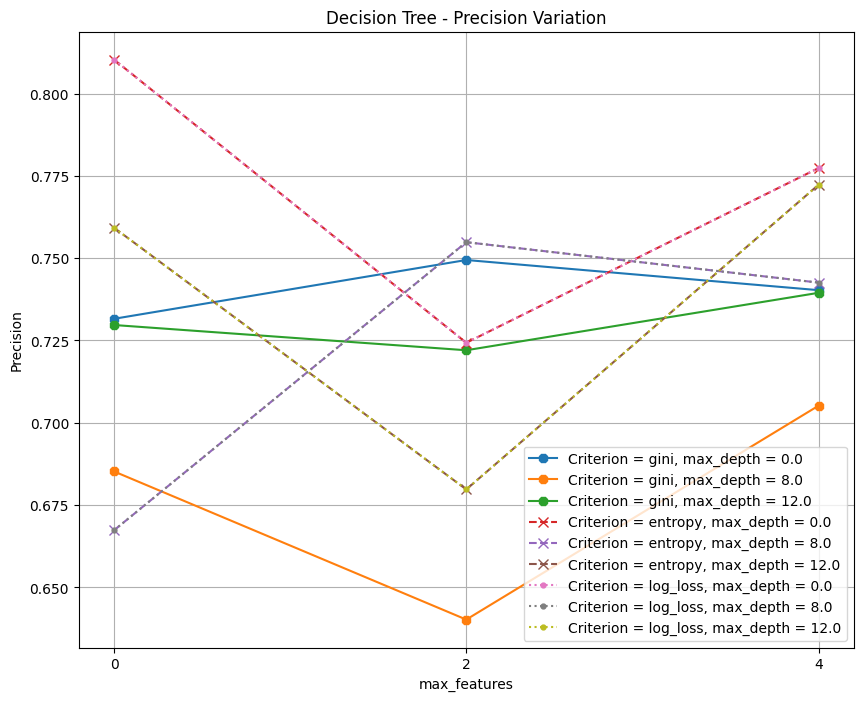

In [ ]:
plt.figure(figsize=(10,8))
for i in criterions:
  for j in depths:
    x_values = np.asarray(df_result.loc[(df_result['max_depth'] == j) & (df_result['criterion']== i)]['max_features'])
    y_values = np.asarray(df_result.loc[(df_result['max_depth'] == j) & (df_result['criterion']== i)]['Precision'])
    plt.plot(x_values, y_values, lines[i], label=f'Criterion = {i}, max_depth = {j}', markersize=7)

plt.xlabel('max_features')
plt.xticks(x_values)
plt.grid(True)
plt.ylabel('Precision')
plt.title("Decision Tree - Precision Variation")
plt.legend()
plt.show()

#### Recall

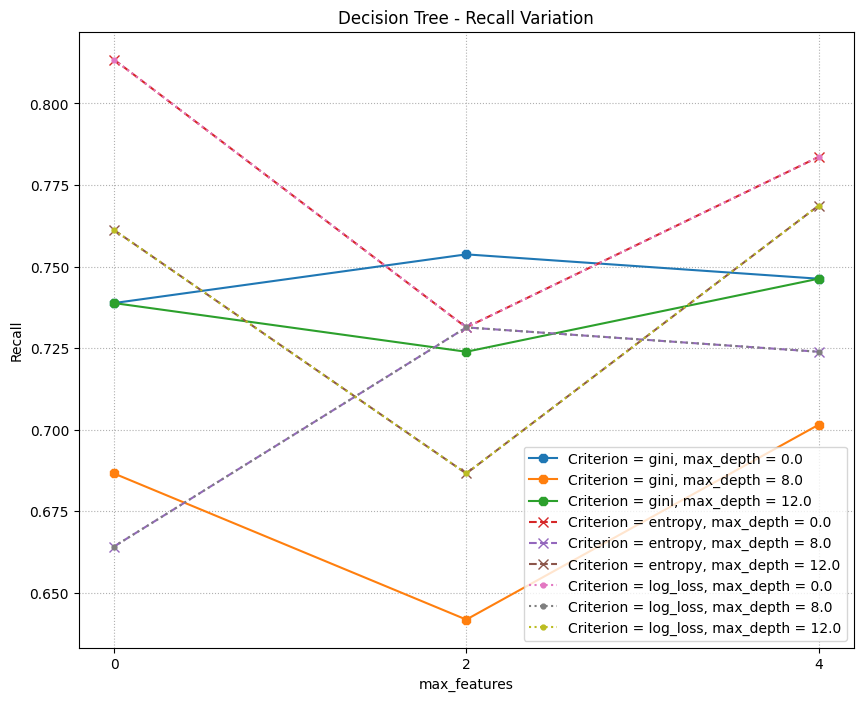

In [ ]:
plt.figure(figsize=(10,8))
for i in criterions:
  for j in depths:
    x_values = np.asarray(df_result.loc[(df_result['max_depth'] == j) & (df_result['criterion']== i)]['max_features'])
    y_values = np.asarray(df_result.loc[(df_result['max_depth'] == j) & (df_result['criterion']== i)]['Recall'])
    plt.plot(x_values, y_values, lines[i], label=f'Criterion = {i}, max_depth = {j}', markersize=7)

plt.xlabel('max_features')
plt.xticks(x_values)
plt.grid(True, ls=':')
plt.ylabel('Recall')
plt.title("Decision Tree - Recall Variation")
plt.legend()
plt.show()

#### F1-Score

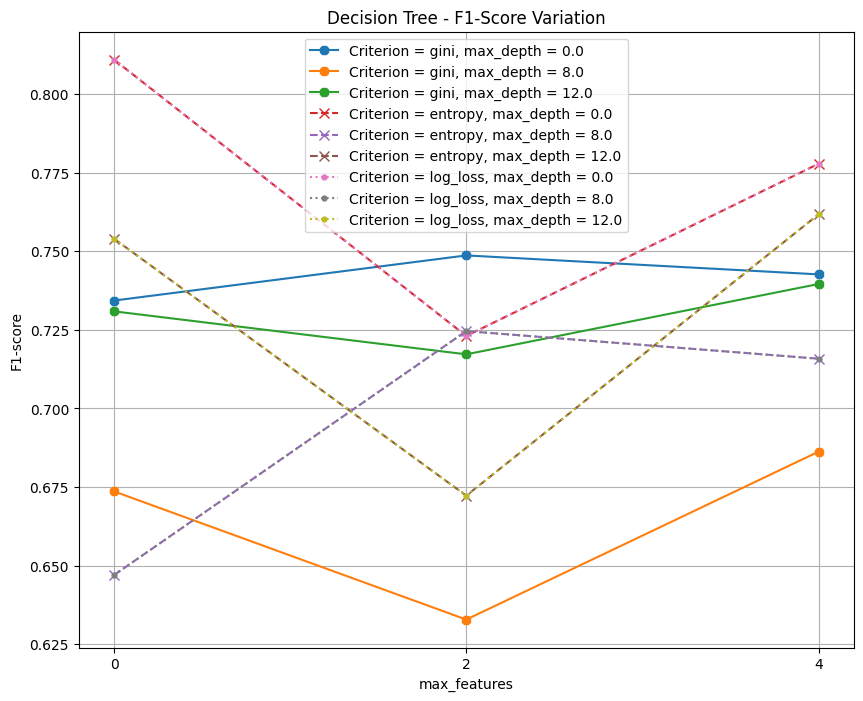

In [ ]:
plt.figure(figsize=(10,8))
for i in criterions:
  for j in depths:
    x_values = np.asarray(df_result.loc[(df_result['max_depth'] == j) & (df_result['criterion']== i)]['max_features'])
    y_values = np.asarray(df_result.loc[(df_result['max_depth'] == j) & (df_result['criterion']== i)]['F1-score'])
    plt.plot(x_values, y_values, lines[i], label=f'Criterion = {i}, max_depth = {j}', markersize=7)

plt.xlabel('max_features')
plt.xticks(x_values)
plt.grid(True)
plt.ylabel('F1-score')
plt.title("Decision Tree - F1-Score Variation")
plt.legend()
plt.show()

### Model Decision Tree dengan akurasi tertinggi:

In [ ]:
mostAccurateTree = df_result.loc[df_result['Accuracy'].idxmax()]
print(mostAccurateTree)

criterion                                          entropy
max_features                                           0.0
max_depth                                              0.0
Accuracy                                          0.813433
Precision                                         0.810303
Recall                                            0.813433
F1-score                                          0.810951
Confusion Matrix    [[36, 1, 10], [0, 38, 0], [12, 2, 35]]
Name: 9, dtype: object


## 4.2 K-Nearest Neighbors KNN (Firzy Allen)

## Overview
**K-Nearest Neighbors (KNN)** adalah algoritma klasifikasi yang beroperasi berdasarkan prinsip kesamaan, di mana ia memprediksi label atau nilai dari titik data baru dengan mempertimbangkan label atau nilai dari K tetangga terdekatnya dalam dataset pelatihan [1]. Algoritma ini bekerja dengan cara membandingkan entri data baru dengan nilai dalam dataset yang diberikan (dengan kelas atau kategori yang berbeda). Berdasarkan kedekatan atau kesamaan dalam rentang tertentu (K) dari tetangga, algoritma menetapkan entri data baru ke kelas atau kategori dalam dataset (data pelatihan) [2].

Berikut adalah penjelasan langkah-langkah dari algoritma KNN:


1.   **Pemilihan Jumlah *Neighbors*** (K):   Pertama, pilih jumlah *Neighbors* (K) yang akan dipertimbangkan. Nilai K ini penting karena akan mempengaruhi hasil prediksi.
2.   **Perhitungan Jarak**: Hitung jarak antara titik target dengan setiap titik dalam dataset. Jarak ini digunakan untuk menentukan tetangga terdekat.
3. **Pemilihan Tetangga Terdekat**: Dari semua titik dalam dataset, pilih K titik yang memiliki jarak terdekat dengan titik target.
4. **Prediksi**: Berdasarkan kelas dari tetangga terdekat, buat prediksi untuk titik target. Keputusan akhir biasanya mengikuti kelas yang paling sering muncul di antara tetangga terdekat.

## Hyperparameter
Dalam implementasi KNN, ada beberapa **hyperparameter** yang dapat divariasikan untuk meningkatkan performa model:

1. **n_neighbors**: Jumlah tetangga terdekat yang akan dipertimbangkan dalam prediksi. Meningkatkan nilai ini dapat membuat model lebih sensitif terhadap perubahan dalam data [3].
2. **Metrik Jarak (*Distance*)**: Metrik jarak yang digunakan untuk menghitung jarak antara titik. Metrik umum yang digunakan dalam KNN termasuk jarak Euclidean, Manhattan, dan Minkowski. Pilihan metrik yang tepat sangat bergantung pada sifat masalah dan struktur data input [3].


Referensi:

[1] GeeksforGeeks, "K-Nearest Neighbours," https://www.geeksforgeeks.org/k-nearest-neighbours/

[2] FreeCodeCamp, "K-Nearest Neighbors Algorithm – Classifiers and Model Example," https://www.freecodecamp.org/news/k-nearest-neighbors-algorithm-classifiers-and-model-example/

[3] ProgrammingR, "KNN Hyperparameters: A Friendly Guide to Optimization," https://www.programmingr.com/knn-hyperparameters-a-friendly-guide-to-optimization/

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Skalasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definisikan tiga set hyperparameter untuk diuji
hyperparameters = [
    {'n_neighbors': 2, 'weights': 'distance'},   # Variasi pertama
    {'n_neighbors': 3, 'weights': 'distance'},   # Variasi kedua
    {'n_neighbors': 4, 'weights': 'distance'},   # Variasi ketiga
]

Pertama, data pelatihan dan uji di-normalisasi menggunakan **StandardScaler** untuk memastikan bahwa semua fitur memiliki skala yang sama, yang penting untuk algoritma KNN.

Kemudian, tiga set **hyperparameter** untuk model KNN didefinisikan, termasuk jumlah tetangga dan bobot yang digunakan dalam algoritma. Ini menyiapkan data dan parameter untuk pelatihan model KNN, yang nantinya akan dilatih dan dievaluasi menggunakan metrik.

In [ ]:
# Fungsi untuk mengevaluasi model KNN dengan hyperparameter yang diberikan
def evaluate_knn_model(X_train, y_train, X_test, y_test, params):
    # Membuat instance KNeighborsClassifier dengan hyperparameter yang ditentukan
    knn_model = KNeighborsClassifier(**params)

    # Melatih model KNN
    knn_model.fit(X_train, y_train)

    # Memprediksi kelas target untuk data uji
    y_pred_knn = knn_model.predict(X_test)

    # Menghitung metrik evaluasi untuk model KNN
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
    recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
    f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

    # Menghitung confusion matrix
    cm = confusion_matrix(y_test, y_pred_knn)

    return {
        "Hyperparameters": params,
        "Accuracy": accuracy_knn,
        "Precision": precision_knn,
        "Recall": recall_knn,
        "F1 Score": f1_knn,
        "Confusion Matrix": cm.tolist() # Convert confusion matrix to list for DataFrame compatibility
    }

# Inisialisasi daftar kosong untuk menyimpan hasil evaluasi
knn_results = []

Fungsi ini menerima data pelatihan dan uji, serta parameter model, dan mengembalikan hasil evaluasi dalam bentuk dictionary yang mencakup akurasi, presisi, recall, F1 score, dan confusion matrix. Dengan menggunakan KNeighborsClassifier dari sklearn, model dilatih dengan data pelatihan, dan kemudian digunakan untuk memprediksi kelas target untuk data uji.

Metrik evaluasi dihitung menggunakan fungsi dari sklearn.metrics, dan confusion matrix diubah menjadi list untuk kompatibilitas dengan DataFrame.

Hasil evaluasi disimpan dalam daftar knn_results, yang nantinya dapat digunakan untuk analisis lebih lanjut atau visualisasi.

## Pengukuran Performa

In [ ]:
# Iterasi melalui setiap set hyperparameter
for i, params in enumerate(hyperparameters, start=1):
    # Mengevaluasi model KNN dengan set hyperparameter saat ini
    result = evaluate_knn_model(X_train_scaled, y_train, X_test_scaled, y_test, params)
    result["Variasi"] = i
    knn_results.append(result)

# Membuat DataFrame pandas untuk menampilkan hasil evaluasi
knn_evaluation = pd.DataFrame(knn_results)
knn_evaluation

,Hyperparameters,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,Variasi
0,"{'n_neighbors': 2, 'weights': 'distance'}",0.813433,0.810509,0.813433,0.810468,"[[36, 2, 9], [0, 38, 0], [12, 2, 35]]",1
1,"{'n_neighbors': 3, 'weights': 'distance'}",0.820896,0.817642,0.820896,0.817711,"[[36, 2, 9], [0, 38, 0], [10, 3, 36]]",2
2,"{'n_neighbors': 4, 'weights': 'distance'}",0.798507,0.796074,0.798507,0.793332,"[[36, 2, 9], [0, 38, 0], [10, 6, 33]]",3


Dari hasil yang diberikan, model dengan n_neighbors sama dengan 3 dan weights sama dengan 'distance' memiliki F1 score tertinggi, yang menunjukkan performa terbaik dalam kasus ini. Hasil ini adalah dari coba coba n_neighbours dari 1-10.

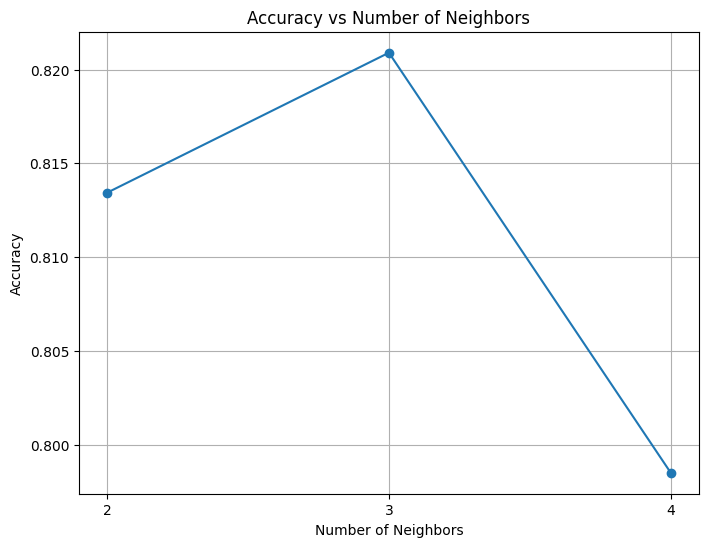

In [ ]:
import matplotlib.pyplot as plt

# Extracting the number of neighbors and accuracy from the evaluation results
neighbors = knn_evaluation['Hyperparameters'].apply(lambda x: x['n_neighbors'])
accuracy = knn_evaluation['Accuracy']

# Plotting the relationship between number of neighbors and accuracy
plt.figure(figsize=(8, 6))
plt.plot(neighbors, accuracy, marker='o', linestyle='-')
plt.title('Accuracy vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

Berikut perbadingan ketiga n_neighbours.

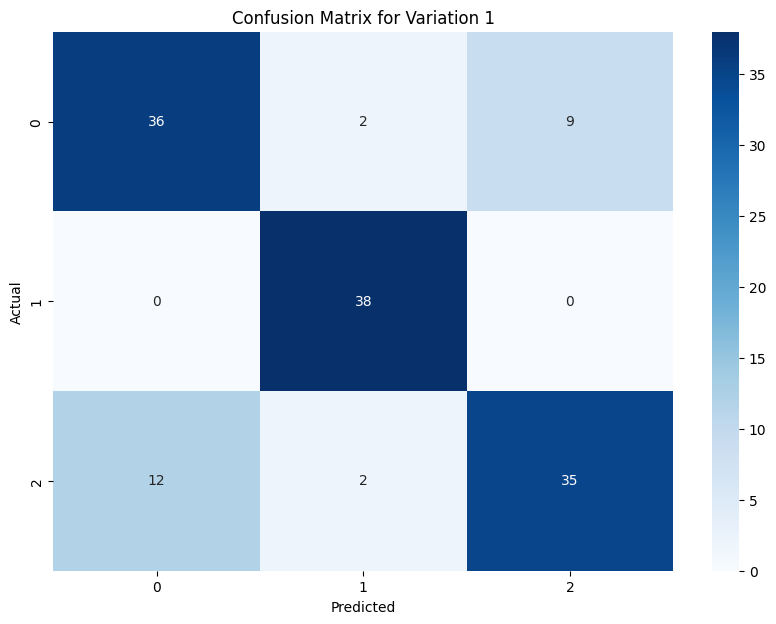

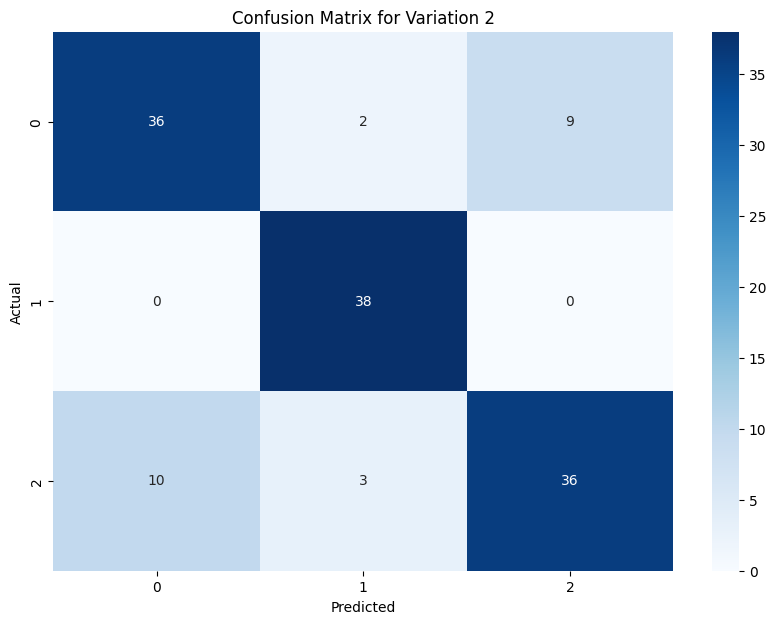

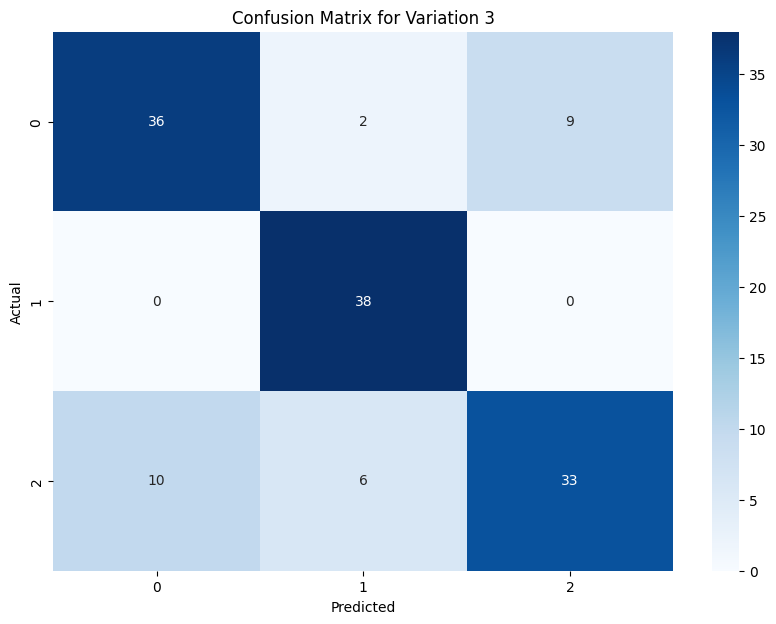

In [ ]:
# Visualisasi confusion matrix untuk setiap variasi model
for i, row in knn_evaluation.iterrows():
    cm = row['Confusion Matrix']
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Variation {row["Variasi"]}')
    plt.show()

Plot Confusion Matrix ini menampilkan distribusi prediksi yang benar dan salah untuk setiap kelas, memungkinkan visualisasi yang jelas tentang bagaimana model KNN berperforma untuk setiap variasi.

## Model KNN Akurasi Tertinggi

In [ ]:
# Menemukan model KNN yang paling akurat
mostAccurateKNN = knn_evaluation.loc[knn_evaluation['Accuracy'].idxmax()]
print(mostAccurateKNN)

Hyperparameters     {'n_neighbors': 3, 'weights': 'distance'}
Accuracy                                             0.820896
Precision                                            0.817642
Recall                                               0.820896
F1 Score                                             0.817711
Confusion Matrix        [[36, 2, 9], [0, 38, 0], [10, 3, 36]]
Variasi                                                     2
Name: 1, dtype: object


## 4.3 Random Forest Model (Muhammad Farhan Haniftyaji)

Random forest merupakan sebuah metode ensemble learning yang menggabungkan beberapa tree predictor yang tiap tree-nya bergantung pada nilai dari sebuah vektor acak yang diambil secara independen dan dengan distribusi yang sama untuk tiap tree di dalam forest. Random forest classifier terdiri dari kumpulan classifier berstruktur tree. Vektor acak yang mengatur pertumbuhan dari tiap tree bersifat independen dan didistribusikan secara identik. Kelebihan dari tiap tree di dalam forest dan korelasi antara mereka memainkan peran krusial dalam menentukan generalisasi error dari forest.

Dilakukan train test splitting dengan perbandingan 8 : 2 sesuai dengan ketentuan proyek

In [ ]:
# Define hyperparameter variations
n_estimators_values = [50, 100, 150]  # Number of trees in the forest
max_depth_values = [5, 10]  # Maximum depth of the tree

# Initialize lists to store results
accuracy = []
precision = []
recall = []
f1_score = []
results = {'confusion_matrices': [], 'classification_reports': []}

dalam proyek ini terdapat 2 jenis hyperparameter yang diubah oleh penulis yaitu:
- n_estimators = banyak tree yang akan dipakai dalam model random forest
- max_depth = kedalaman maksimum setiap decision tree di dalam forest

ketiga hyperparameter ini akan dikombinasikan satu sama lain sehingga menghasilkan 6 variasi yang berbeda. Hasil dari training model akan ditampilkan dalam bentuk metric evaluasi yang ditentukan sebagai berikut :
- confusion matrix
- akurasi
- presisi
- recall
- f1-score



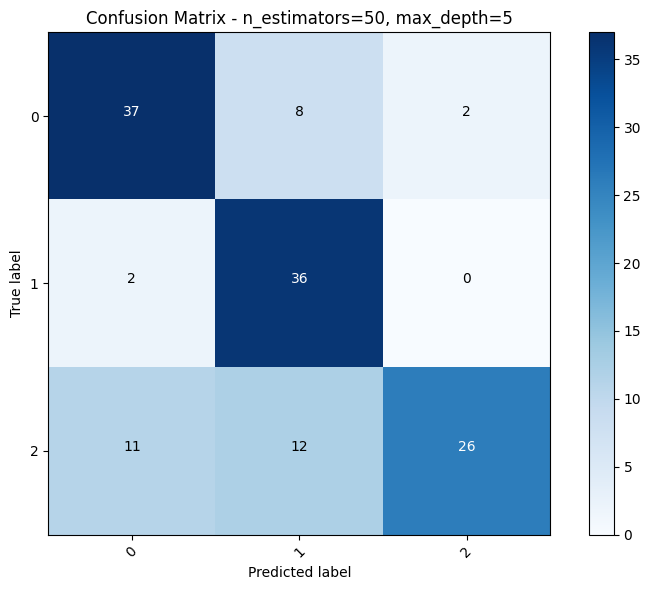

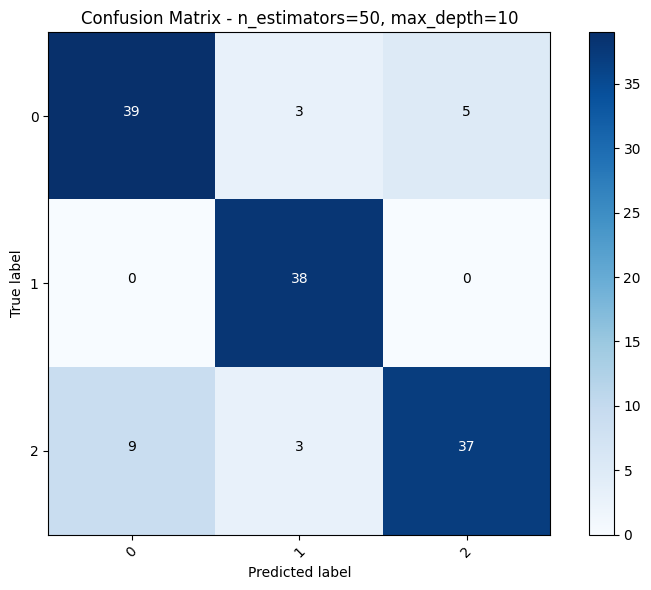

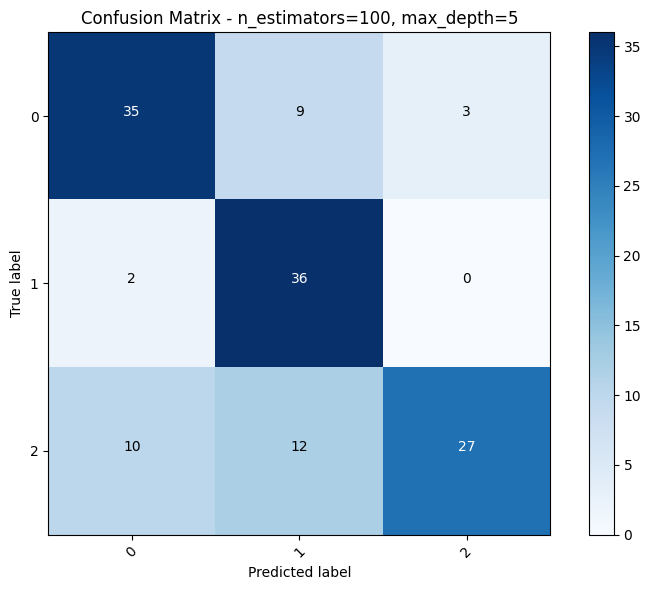

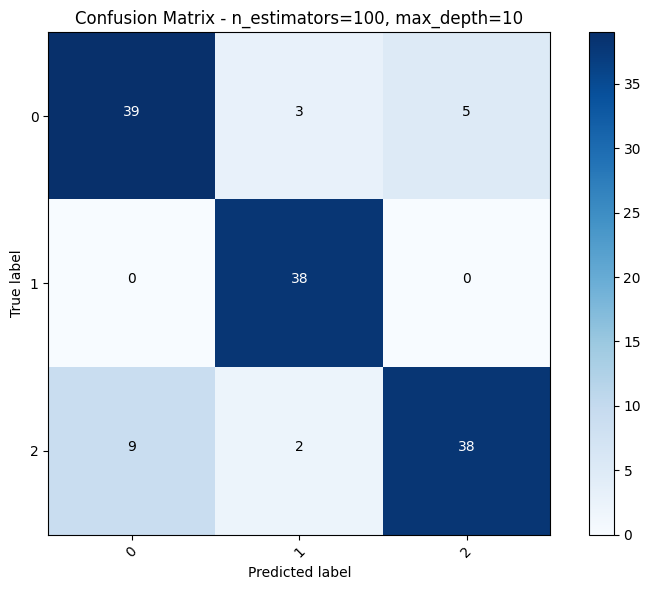

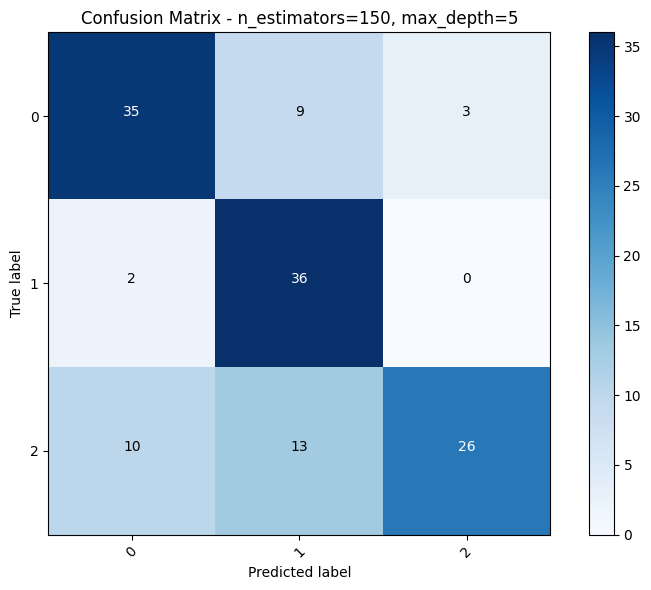

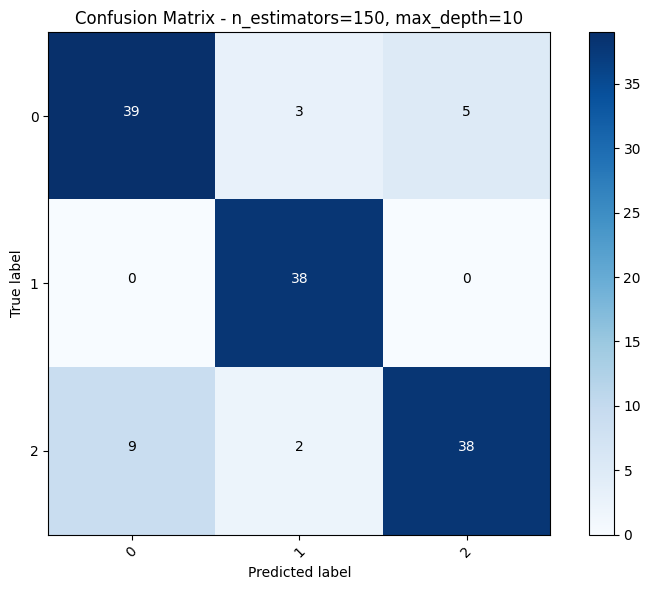

In [ ]:
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # Initialize and train the random forest classifier
        clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        clf.fit(X_train, y_train)

        # Predictions
        y_pred = clf.predict(X_test)

        # Calculate metrics
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred, output_dict=True)

        # Calculate performance metrics
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy.append(report['accuracy'])
        precision.append(report['weighted avg']['precision'])
        recall.append(report['weighted avg']['recall'])
        f1_score.append(report['weighted avg']['f1-score'])

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix - n_estimators={n_estimators}, max_depth={max_depth}')
        plt.colorbar()
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.xticks(ticks=np.arange(len(np.unique(y))), labels=np.unique(y), rotation=45)
        plt.yticks(ticks=np.arange(len(np.unique(y))), labels=np.unique(y))
        plt.tight_layout()

        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

        plt.show()

Pada code ini, penulis melakukan looping untuk hyperparameter n_estimator dan max_depth yang di define di awal. Kemudian dilakukan training berdasarkan variasi dari hyperparameter. Setelah dilakukan prediksi, code akan melakukan plot confusion matrix untuk melihat seberapa akurat model dalam menentukan kelasnya.

In [ ]:
# Reshape the lists to 2D arrays for plotting
accuracy = np.array(accuracy).reshape(len(n_estimators_values), len(max_depth_values))
precision = np.array(precision).reshape(len(n_estimators_values), len(max_depth_values))
recall = np.array(recall).reshape(len(n_estimators_values), len(max_depth_values))
f1_score = np.array(f1_score).reshape(len(n_estimators_values), len(max_depth_values))

selanjutnya dilakukan ploting untuk melihat model random forest dengan hyperparameter mana yang memiliki tingkat akurasi, presisi, recall, dan f1-score tertinggi.

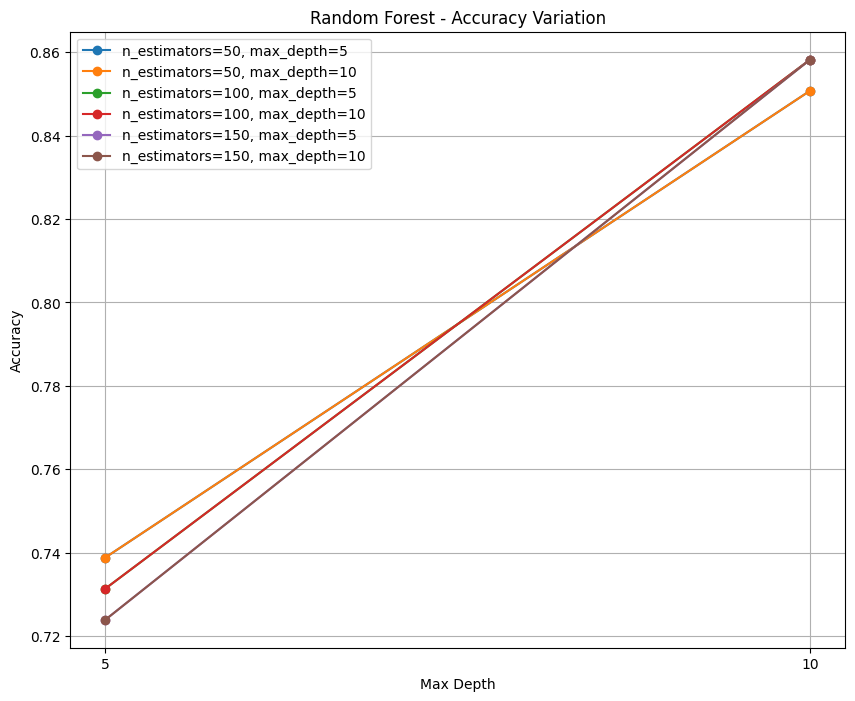

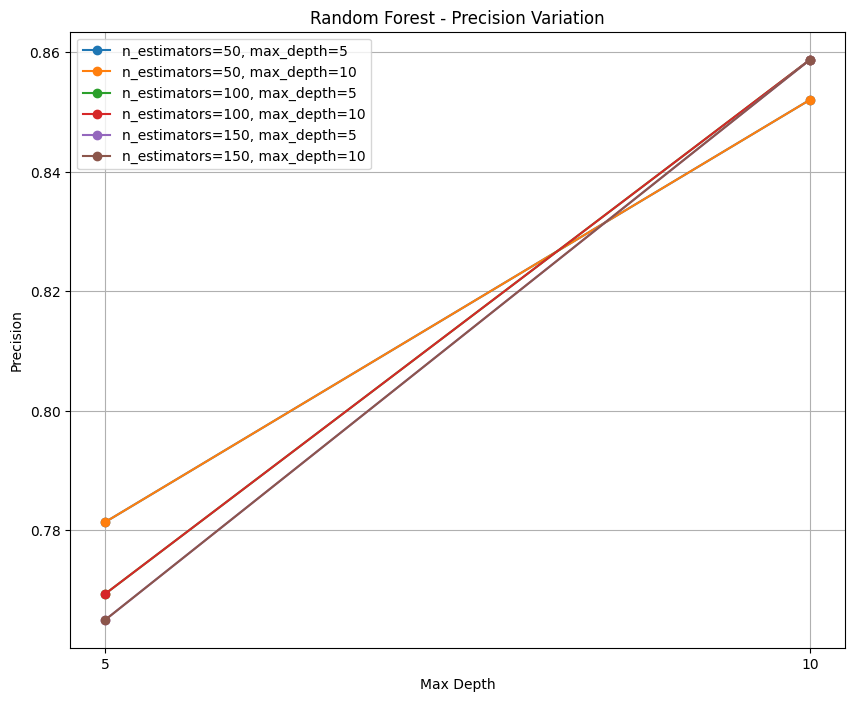

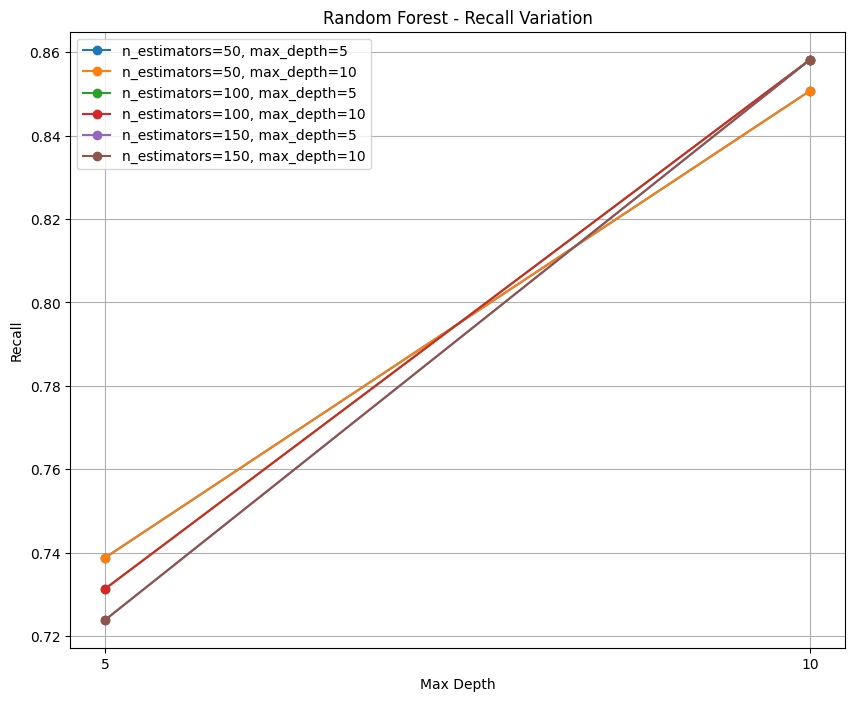

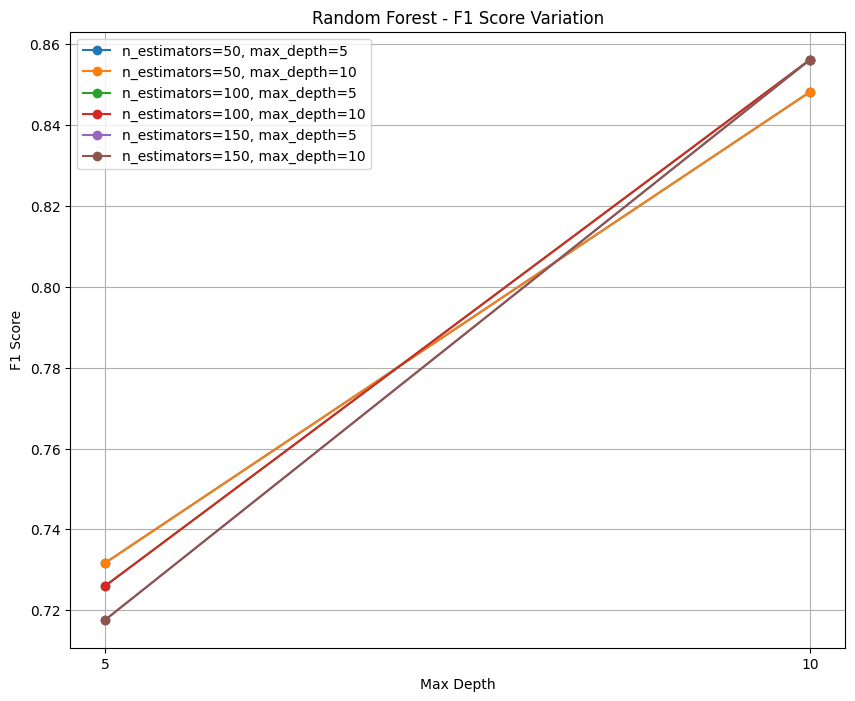

In [ ]:
# Define metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score}

# Plotting
for metric_name, metric_array in metrics.items():
    plt.figure(figsize=(10, 8))
    for i, n_estimators in enumerate(n_estimators_values):
        for j, max_depth in enumerate(max_depth_values):
            plt.plot(max_depth_values, metric_array[i, :], marker='o', label=f'n_estimators={n_estimators}, max_depth={max_depth}')
    plt.title(f'Random Forest - {metric_name} Variation')
    plt.xlabel('Max Depth')
    plt.ylabel(metric_name)
    plt.legend()
    plt.xticks(max_depth_values)
    plt.grid(True)
    plt.show()

Dapat dilihat bahwa dengan mengubah 2 hyperparemeter hasil dari masing masing model memiliki nilai yang berbeda terhadap metricsnya. Dengan tuning hyperparameter yang tepat kita dapat mencapai nilai metrics yang terbaik. dari hasil yang didapatkan rata-rata nilai yang didapat berada di kisaran 85 hingga 86%

In [ ]:
# Find the variation with the highest score
max_index = np.unravel_index(np.argmax(accuracy), accuracy.shape)

# Extract hyperparameters
best_n_estimators = n_estimators_values[max_index[0]]
best_max_depth = max_depth_values[max_index[1]]

# Print the best combination of hyperparameters
print(f"Best combination of hyperparameters: n_estimators={best_n_estimators}, max_depth={best_max_depth}")

# Print the evaluation metrics
print("Metrics:")
print(f"Accuracy: {accuracy[max_index]:.4f}")
print(f"Precision: {precision[max_index]:.4f}")
print(f"Recall: {recall[max_index]:.4f}")
print(f"F1 Score: {f1_score[max_index]:.4f}")

Best combination of hyperparameters: n_estimators=100, max_depth=10
Metrics:
Accuracy: 0.8582
Precision: 0.8587
Recall: 0.8582
F1 Score: 0.8561


# BAB 5 - ANALISIS

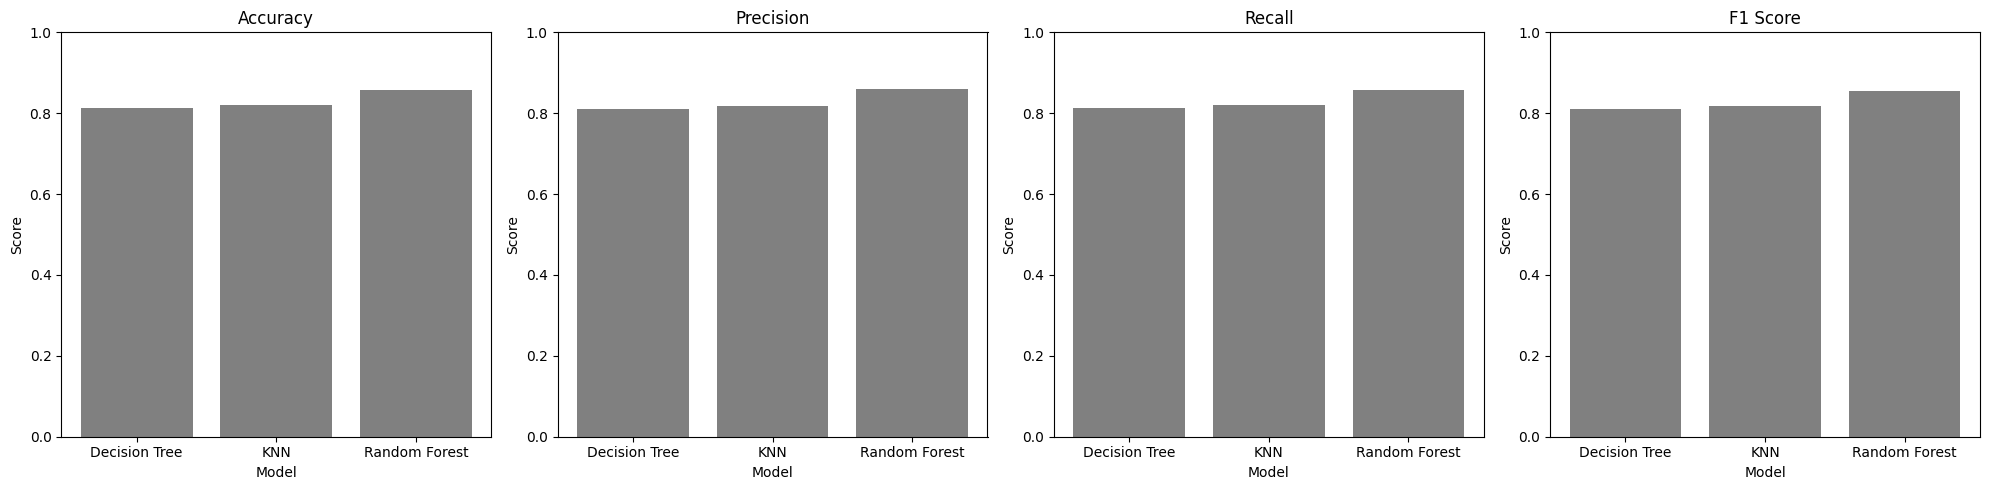

In [ ]:
import matplotlib.pyplot as plt

models = ['Decision Tree', 'KNN', 'Random Forest']
accuracy = [0.813433, 0.820896, 0.8582]
precision = [0.810303, 0.817642, 0.8587]
recall = [0.813433, 0.820896, 0.8582]
f1_score = [0.810951, 0.817711, 0.8561]

# Plot for Accuracy
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.bar(models, accuracy, color='gray')
plt.title('Accuracy')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)

# Plot for Precision
plt.subplot(1, 4, 2)
plt.bar(models, precision, color='gray')
plt.title('Precision')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)

# Plot for Recall
plt.subplot(1, 4, 3)
plt.bar(models, recall, color='gray')
plt.title('Recall')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)

# Plot for F1 Score
plt.subplot(1, 4, 4)
plt.bar(models, f1_score, color='gray')
plt.title('F1 Score')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

Dari hasil yang didapatkan, kita bisa melihat bahwa akurasi tertinggi dimiliki oleh model Random forest. Hal ini dapat terjadi karena Random forest memiliki kemampuan yang tahan terhadap outlier ataupun missing data.

Faktor lain yang terjadi adalah pemilihan tuning parameter yang tepat dari model random forest ketimbang model yang lain dalam melakukan klasifikasi sehingga memeberikan hasil akurasi, precision, recall, dan f1-score yang lebih tinggi

# BAB 6 - KESIMPULAN

**Kesimpulan**:

- Kemampuan Algoritma: K-Nearest Neighbors (KNN), Random Forest, dan Decision Tree merupakan algoritma yang efektif untuk kasus klasifikasi multiclass. Mereka semua dapat digunakan untuk memprediksi kelas dari data berdasarkan fitur-fitur yang ada. Algoritma ini memiliki kemampuan untuk menangani berbagai jenis data dan struktur, membuatnya cocok untuk berbagai aplikasi klasifikasi.
- Pemilihan Fitur: Fitur yang dipilih untuk kasus ini meliputi Bilirubin, Prothrombin, Stage, Copper, Ascites, dan SGOT. Pemilihan fitur ini dilakukan melalui metode korelasi Pearson, yang menunjukkan hubungan statistik antara variabel target dan fitur. Metode ini membantu dalam memilih fitur yang paling relevan dan memiliki hubungan yang signifikan dengan variabel target, sehingga meningkatkan akurasi model.
- Performa Model: Hasil evaluasi menunjukkan bahwa model KNN memiliki akurasi sebesar 82%, sedangkan model Decision Tree memiliki akurasi sebesar 81.34%. Model Random Forest menunjukkan performa terbaik dengan akurasi sebesar 85.82%. Performa ini menunjukkan bahwa model Random Forest memiliki kemampuan untuk memprediksi kelas dengan lebih akurat dibandingkan dengan model KNN dan Decision Tree.
- Kesimpulan Terbaik Model sesuai Pemilihan Fitur Kelas: Dari pengujian dataset Cirrhosis Patient Survival Prediction menggunakan tiga metode classifier yang berbeda, yaitu K-Nearest Neighbors, Random Forest, dan Decision Tree, dapat disimpulkan bahwa algoritma classifier yang terbaik adalah Random Forest. Ini didasarkan pada performa terbaik yang dicapai oleh model Random Forest dalam kasus ini.
- Keunggulan Random Forest: Random Forest dapat menjadi algoritma classifier terbaik karena kemampuannya untuk menangani hubungan data yang kompleks dan menghasilkan generalisasi yang tinggi. Algoritma ini juga mampu mengurangi overfitting, yang merupakan masalah umum dalam klasifikasi, dengan menggunakan ensemble dari banyak pohon keputusan. Hal ini membuat Random Forest menjadi pilihan yang ideal untuk kasus klasifikasi yang kompleks dan data yang besar.

# REFERENSI

[1]"sklearn.ensemble.RandomForestClassifier," scikit-learn Documentation, [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.

[2]"sklearn.tree.DecisionTreeClassifier," scikit-learn Documentation, [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.

[3]"K-nearest Neighbours," GeeksforGeeks, [Online]. Available: https://www.geeksforgeeks.org/k-nearest-neighbours/.

[4]Prasad, Parul. "K-Nearest Neighbors Algorithm: Classifiers and Model Example," freeCodeCamp.org, [Online]. Available: https://www.freecodecamp.org/news/k-nearest-neighbors-algorithm-classifiers-and-model-example/.

[5]"KNN Hyperparameters: A Friendly Guide to Optimization," ProgrammingR, [Online]. Available: https://www.programmingr.com/knn-hyperparameters-a-friendly-guide-to-optimization/.
